# Importing Libraries 

In [5]:
import pandas as pd 
import numpy as np 
import os 
import warnings 
warnings.filterwarnings("ignore")

In [6]:
%pwd

'/Users/hemalpatel/Desktop/Win Prediction'

In [7]:
%cd '/Users/hemalpatel/Desktop/Win Prediction'

/Users/hemalpatel/Desktop/Win Prediction


# Importing Dataset 

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data_path = "data"
file_path = os.path.join(data_path,"Win_Prediction_Data.xlsx")
df = pd.read_excel(file_path)

### # Reading and understanding the Data

In [9]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [9]:
df.shape

(10061, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB



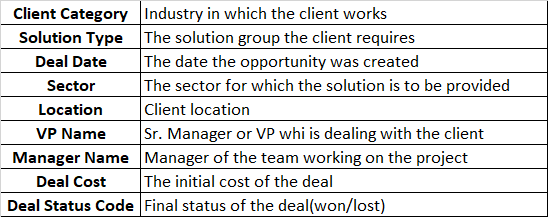

### Now let's drop the unnecessary columns which doesn't have any effect on Deal Status code
##### here we see that "Date" and "Manager name" are not any effect on our prediction so we drop both of these columns

In [10]:
df1 = df.drop(columns=["Deal Date","Manager Name"])

In [11]:
df1.head()

,Client Category,Solution Type,Sector,Location,VP Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,150000.00,Won
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,744705.88,Won
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,60000.00,Lost
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,60000.00,Lost
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,80882.35,Lost


### 'List' and 'count in Percentage' of unique values of all variables

In [13]:
for col in df1:
    print(col)
    print(df1[col].unique())
    print(df1[col].value_counts(normalize=True)*100)

Client Category
['Telecom' 'Internal' 'Govt' 'Consumer Good' 'International Bank'
 'Domestic Public Bank' 'Finance' 'Manufacturing' 'Services_based'
 'Research Development' 'Others' 'Hospitality' 'Consulting'
 'Retail_market' 'Energy ' 'Domestic Private Bank' 'Industries' 'Tech'
 'Healthcare' 'Electronics' 'Domestic Bank' 'Automobiles' 'Medical '
 'Infrastructure' 'Pharma' 'Power ind' 'Holding' 'Logistics' 'Insurance'
 'Payment' 'Energy' 'Govt Bank Special' 'Management' 'Media_Journal'
 'International Org' 'Real Estate' nan 'Tax_audit' 'Share_market'
 'Knowledge' 'Airpline' 'e-commerce']
Others                   17.661791
Internal                 14.566219
Services_based           12.041675
Tech                      9.146464
Domestic Public Bank      4.197556
International Bank        3.766780
Consulting                3.526347
Finance                   3.396113
Telecom                   3.275897
Power ind                 2.644761
Domestic Private Bank     2.624725
Insurance           

### replace with null where value count is less than 10 

In [14]:
clm = ['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name']
for i in clm:
    vl =pd.DataFrame([df1[i].value_counts()]).T
    vl =vl[vl[i]<=10]
    vlc = list(vl[i].index)
    #print(vlc)
    for j in vlc:
        df1[i]= df1[i].replace(j,np.nan)
            

##  checking the precentage of the null values 

In [15]:
df_null = pd.DataFrame(df1.isnull().sum())
df_null = df_null.rename(columns={0:'Number of null values'})
df_null['Percentage null values'] = df1.isnull().mean()*100
df_null

,Number of null values,Percentage null values
Client Category,91,0.904483
Solution Type,95,0.944240
Sector,3,0.029818
Location,8,0.079515
VP Name,14,0.139151
Deal Cost,0,0.000000
Deal Status Code,0,0.000000


### Droping the row which column have less than 5% null value

In [16]:
df1 = df1.dropna()

In [17]:
df1.isnull().sum().sum()

0

# Data Visualization 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

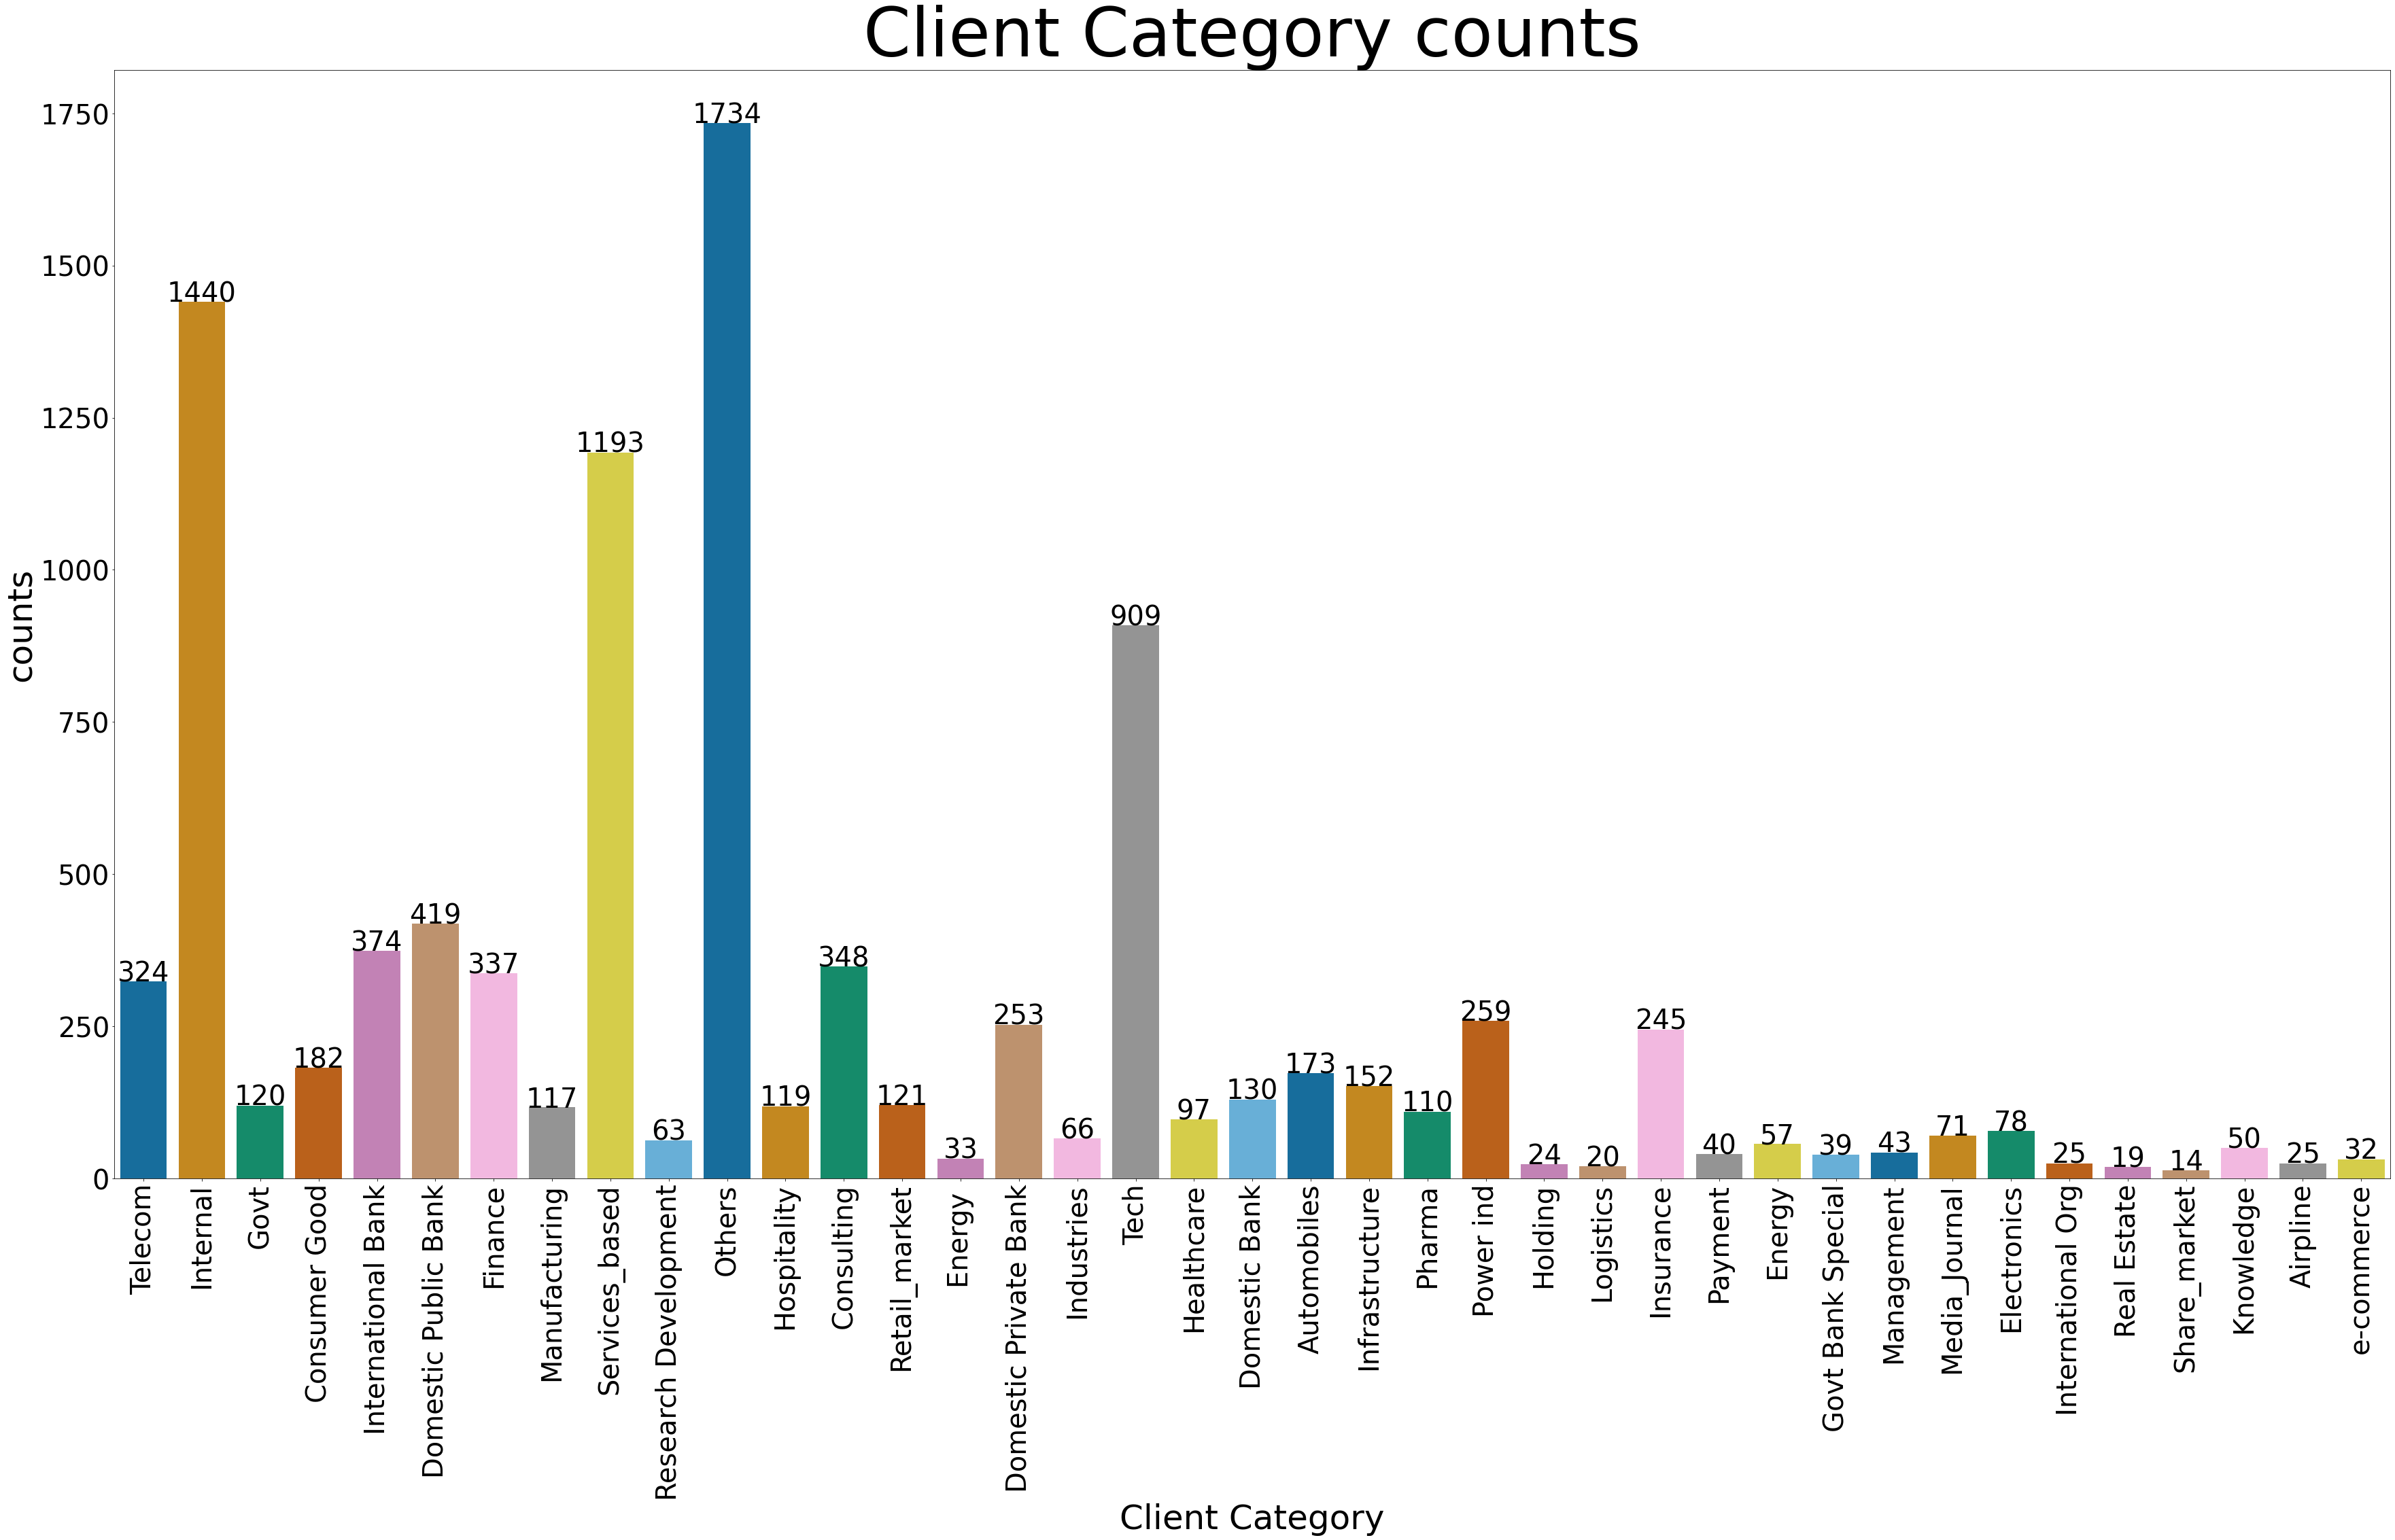

In [19]:
plt.figure(figsize=(60,30))

clientplot =sns.countplot(x="Client Category",data=df1,palette="colorblind")
clientplot.set_title("Client Category counts",fontsize=100)
plt.xticks(size=40,rotation=90)
plt.yticks(size=40)
plt.xlabel("Client Category",size=50)
plt.ylabel("counts",size=50)
for rect in clientplot.patches:
    clientplot.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 40)


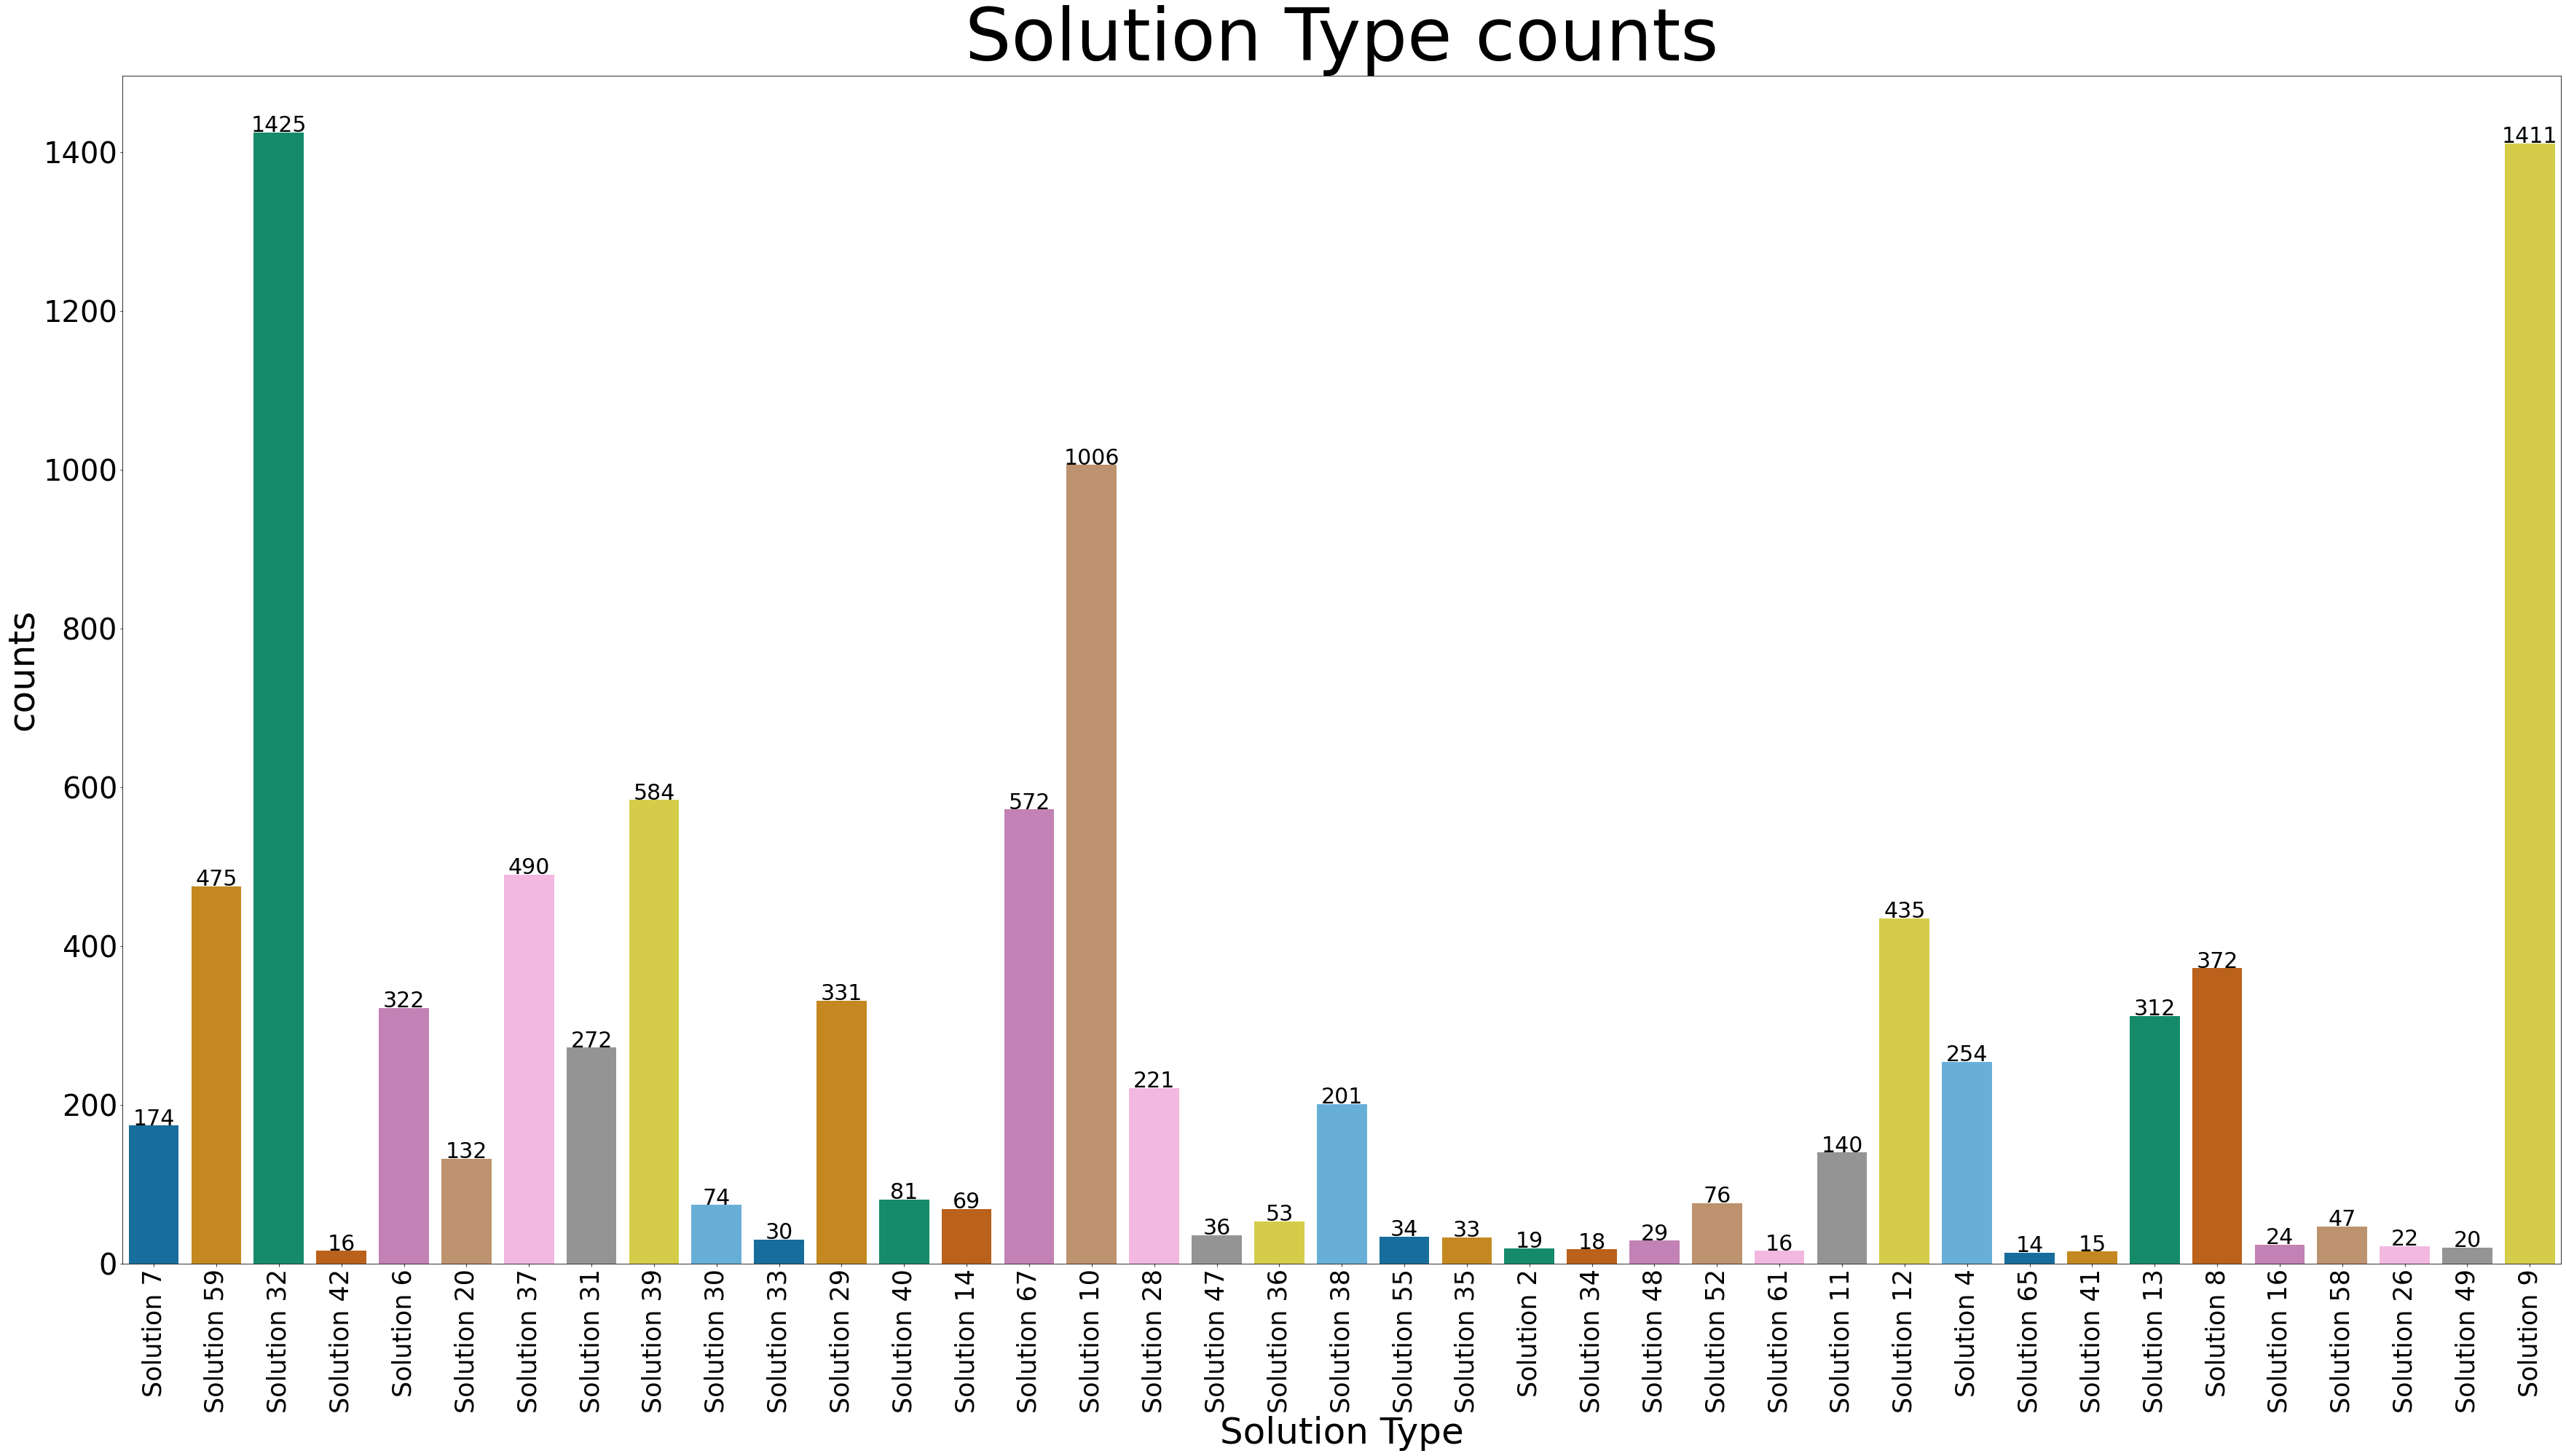

In [20]:
plt.figure(figsize=(60,30))
solution =sns.countplot(x="Solution Type",data=df1,palette="colorblind")
solution.set_title("Solution Type counts",fontsize=100)
plt.xticks(size=35,rotation=90)
plt.yticks(size=40)
plt.xlabel("Solution Type",size=50)
plt.ylabel("counts",size=50)
for rect in solution.patches:
    solution.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 30)


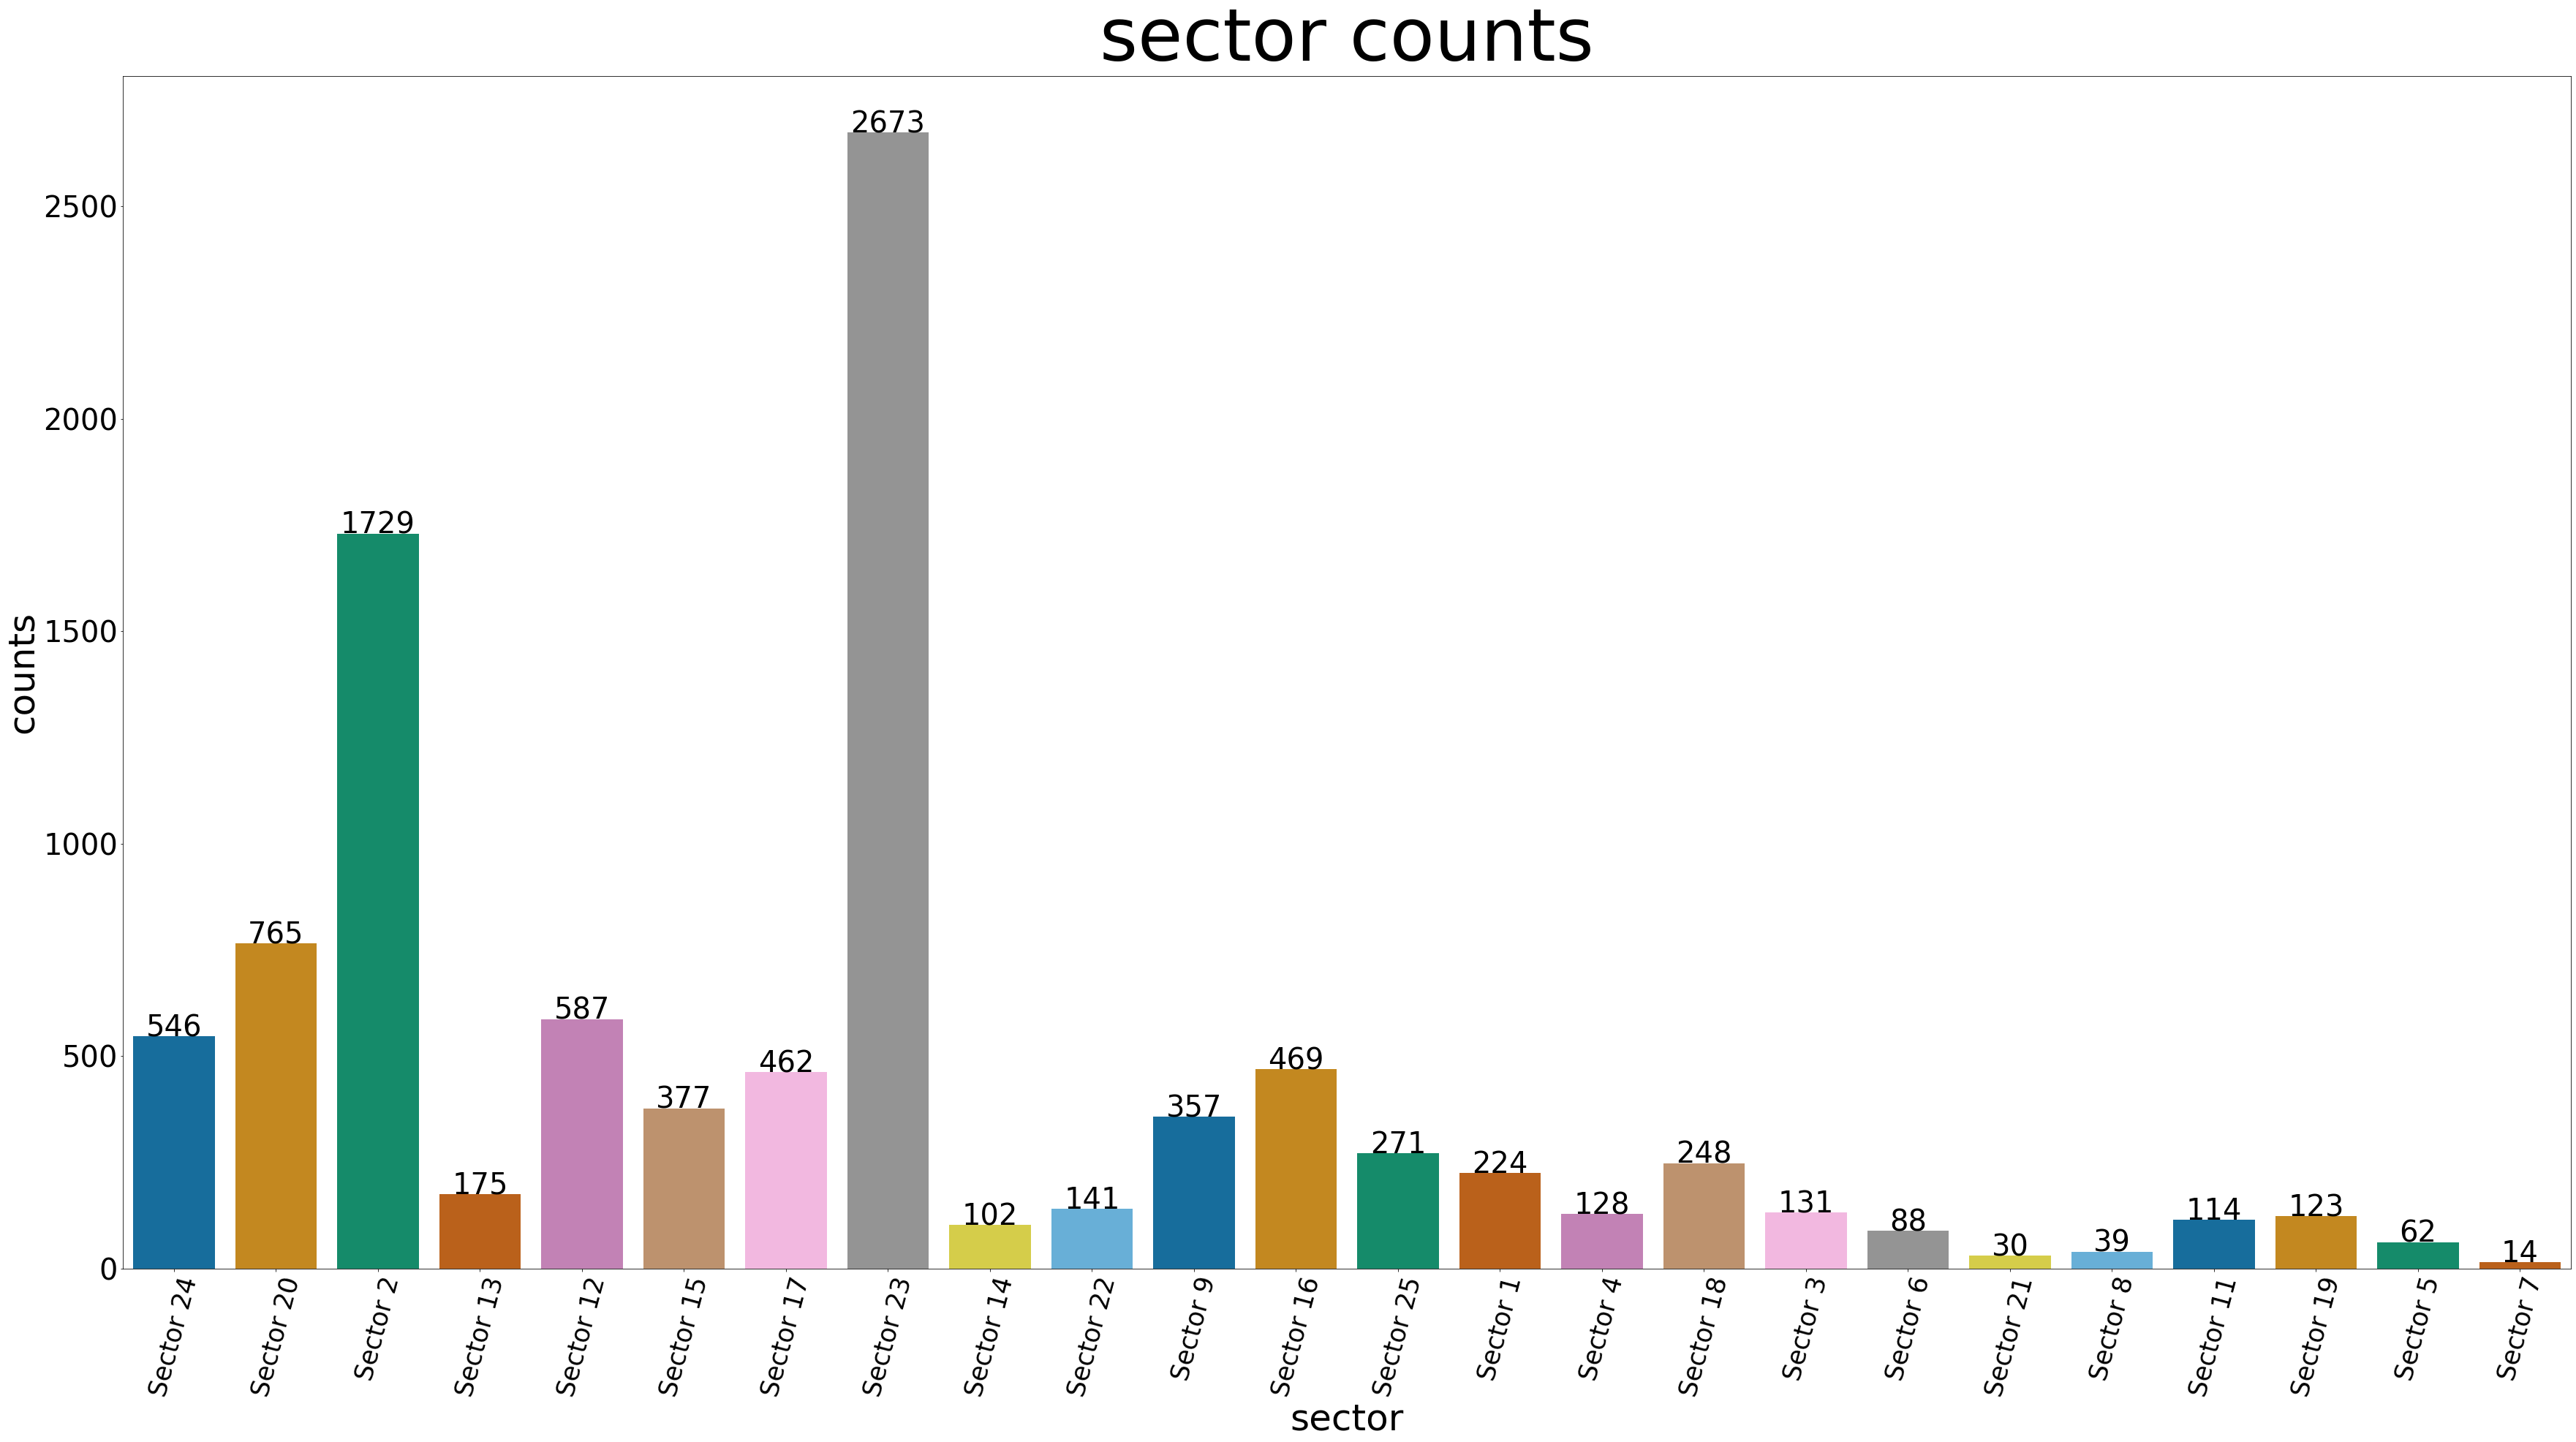

In [21]:
plt.figure(figsize=(60,30))
sector =sns.countplot(x="Sector",data=df1,palette="colorblind")
sector.set_title("sector counts",fontsize=100)
plt.xticks(size=35,rotation=75)
plt.yticks(size=40)
plt.xlabel("sector",size=50)
plt.ylabel("counts",size=50)
for rect in sector.patches:
    sector.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 40)


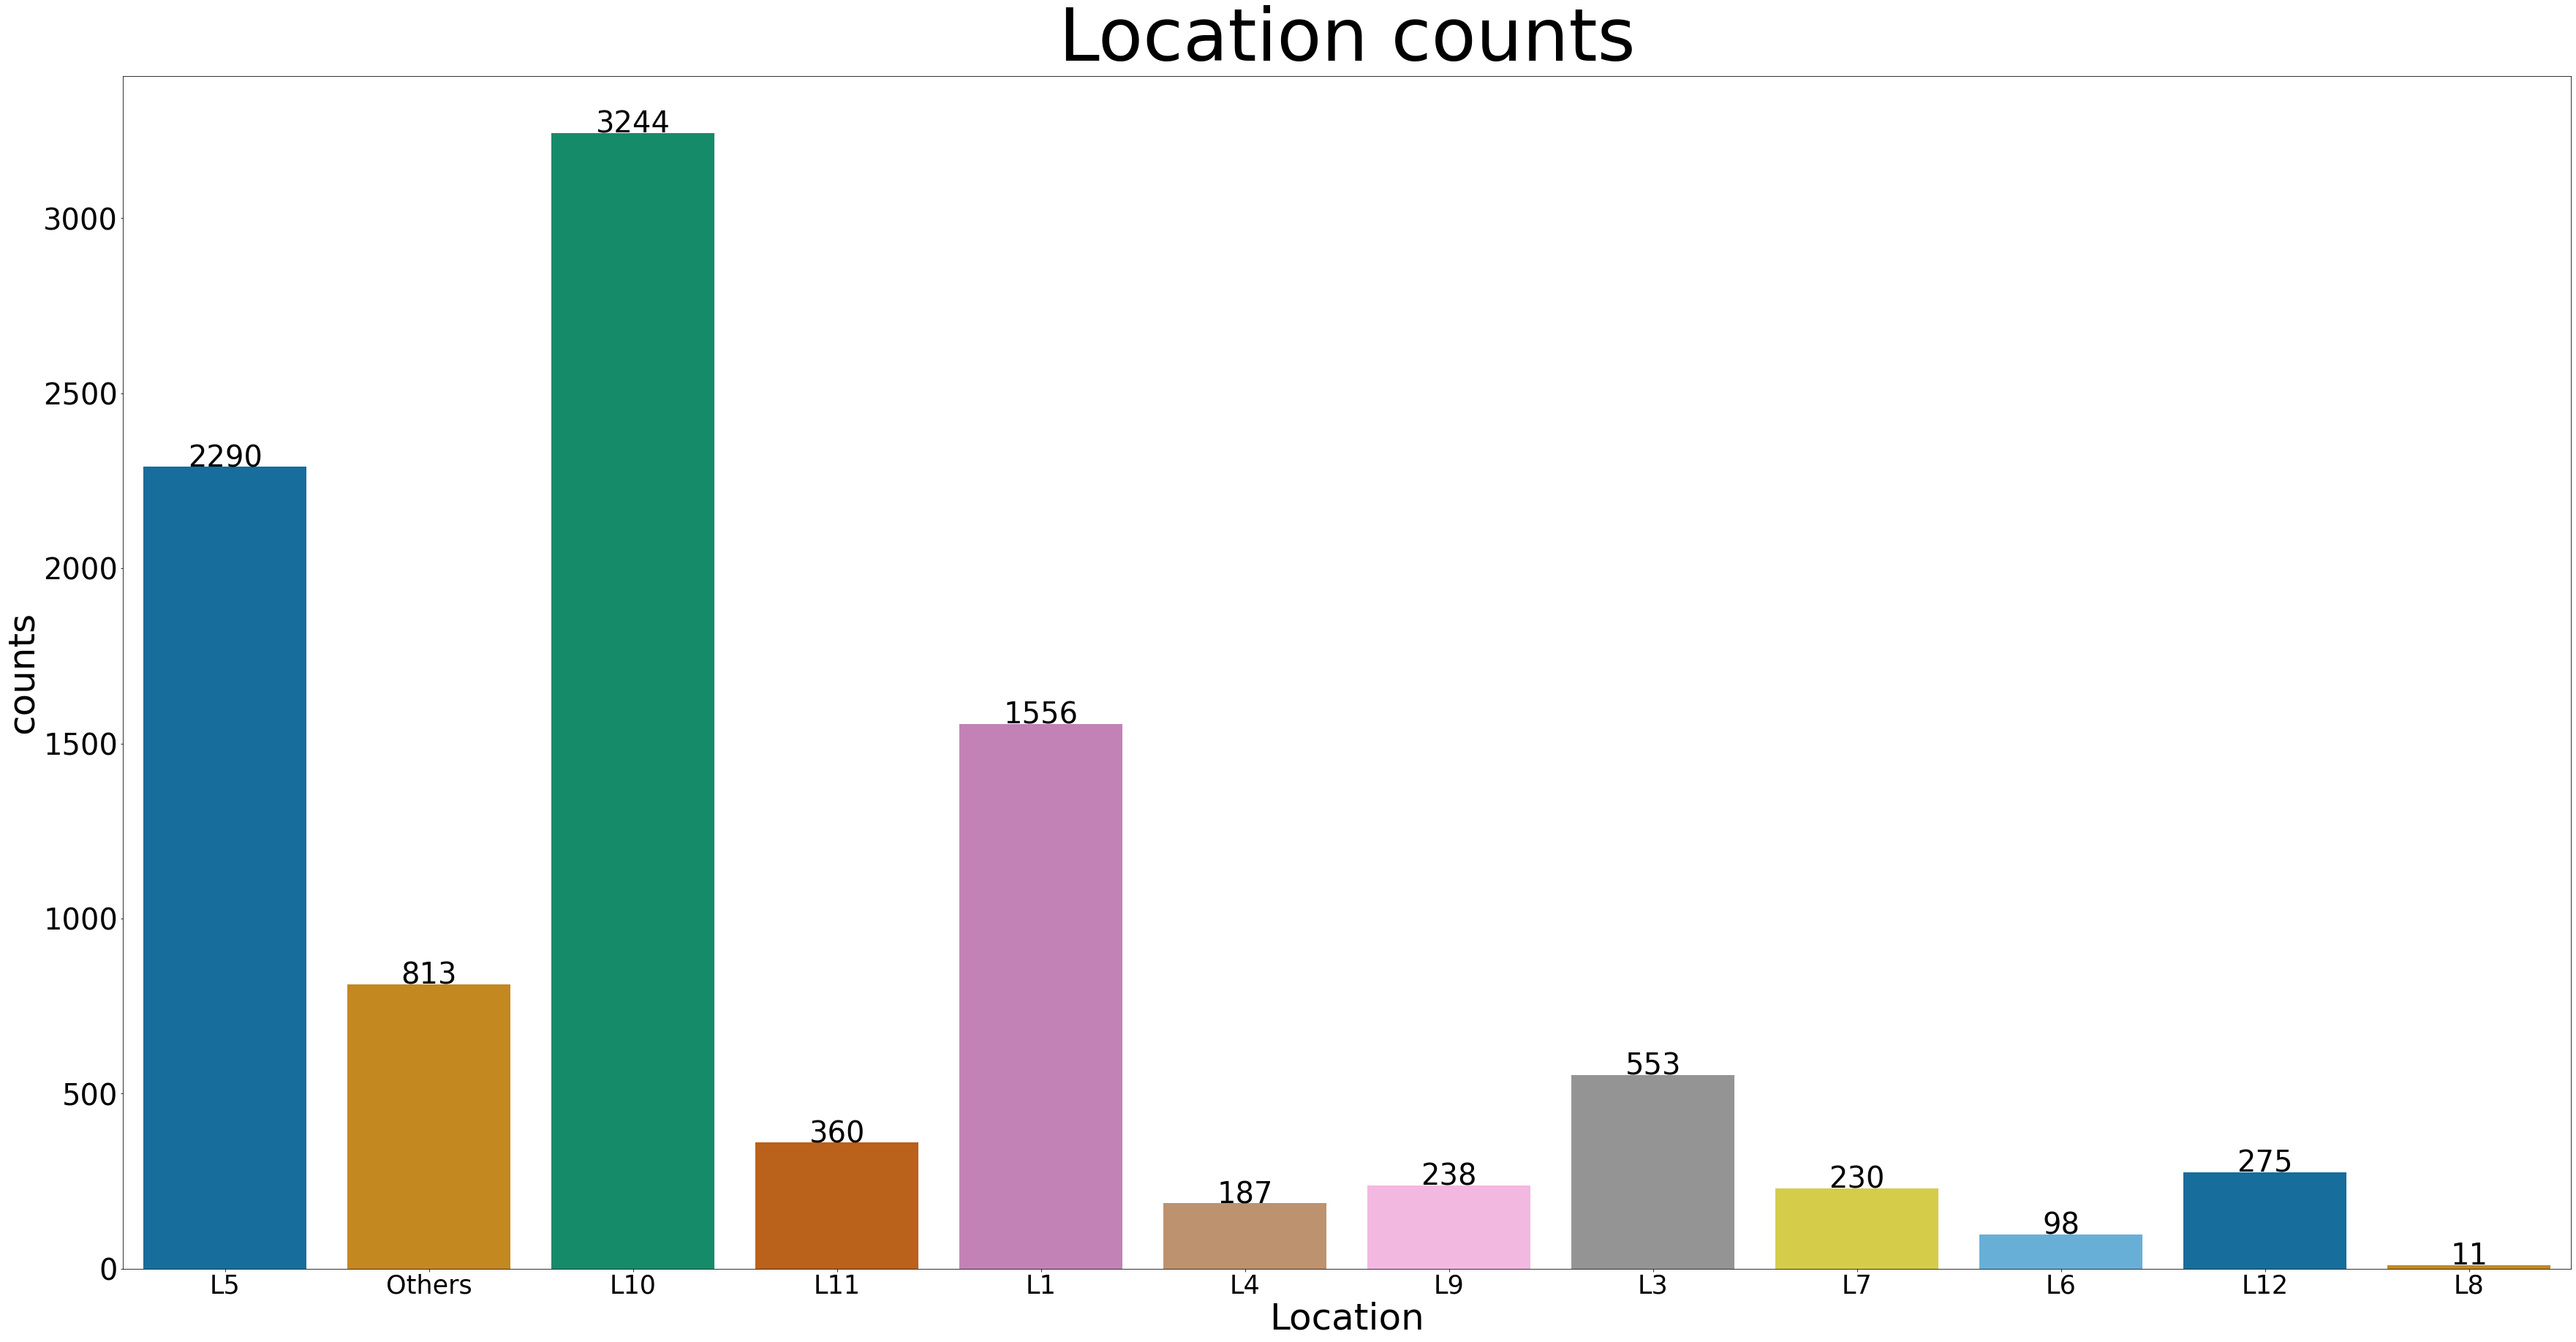

In [22]:
plt.figure(figsize=(60,30))
location =sns.countplot(x="Location",data=df1,palette="colorblind")
location.set_title("Location counts",fontsize=100)
plt.xticks(size=35)
plt.yticks(size=40)
plt.xlabel("Location",size=50)
plt.ylabel("counts",size=50)
for rect in location.patches:
    location.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 40)


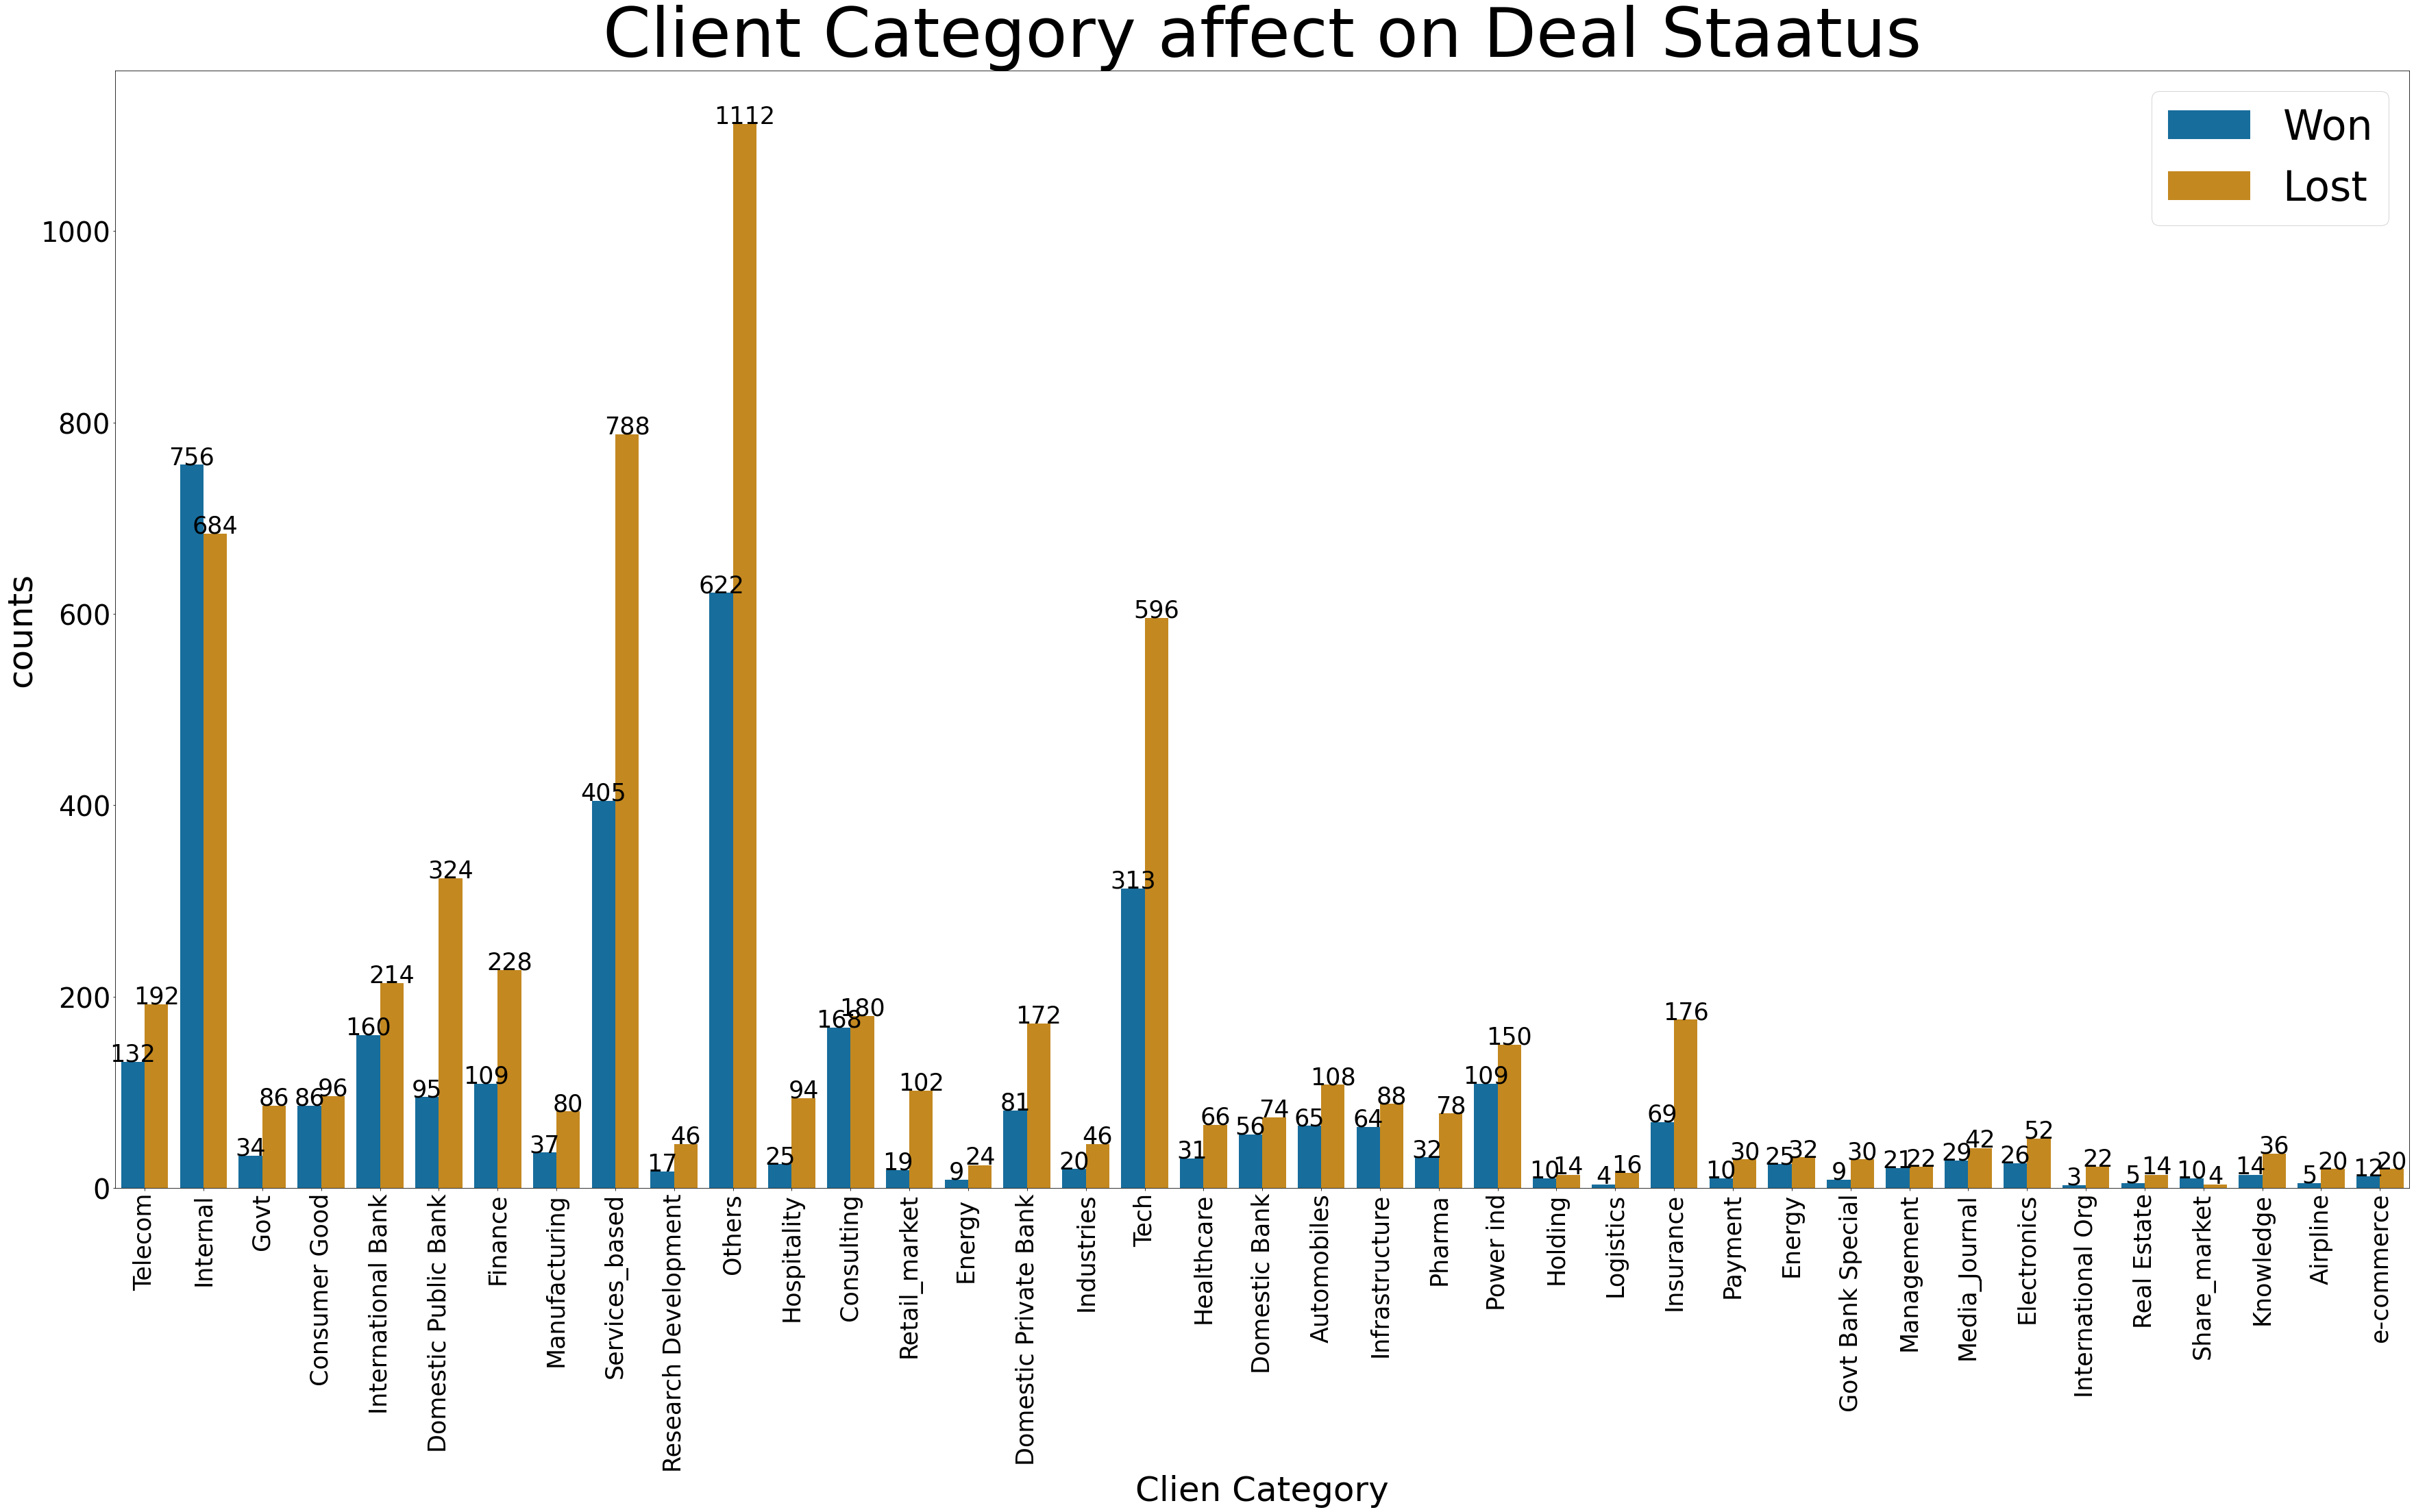

In [23]:
plt.figure(figsize=(60,30))
a =sns.countplot(x="Client Category",hue = "Deal Status Code",data=df1,palette="colorblind")
a.set_title("Client Category affect on Deal Staatus",fontsize=100)
plt.xticks(size=35,rotation=90)
plt.yticks(size=40)
a.legend(fontsize=60)
plt.xlabel("Clien Category",size=50)
plt.ylabel("counts",size=50)
for rect in a.patches:
    a.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 35)

Text(0, 0.5, 'counts')

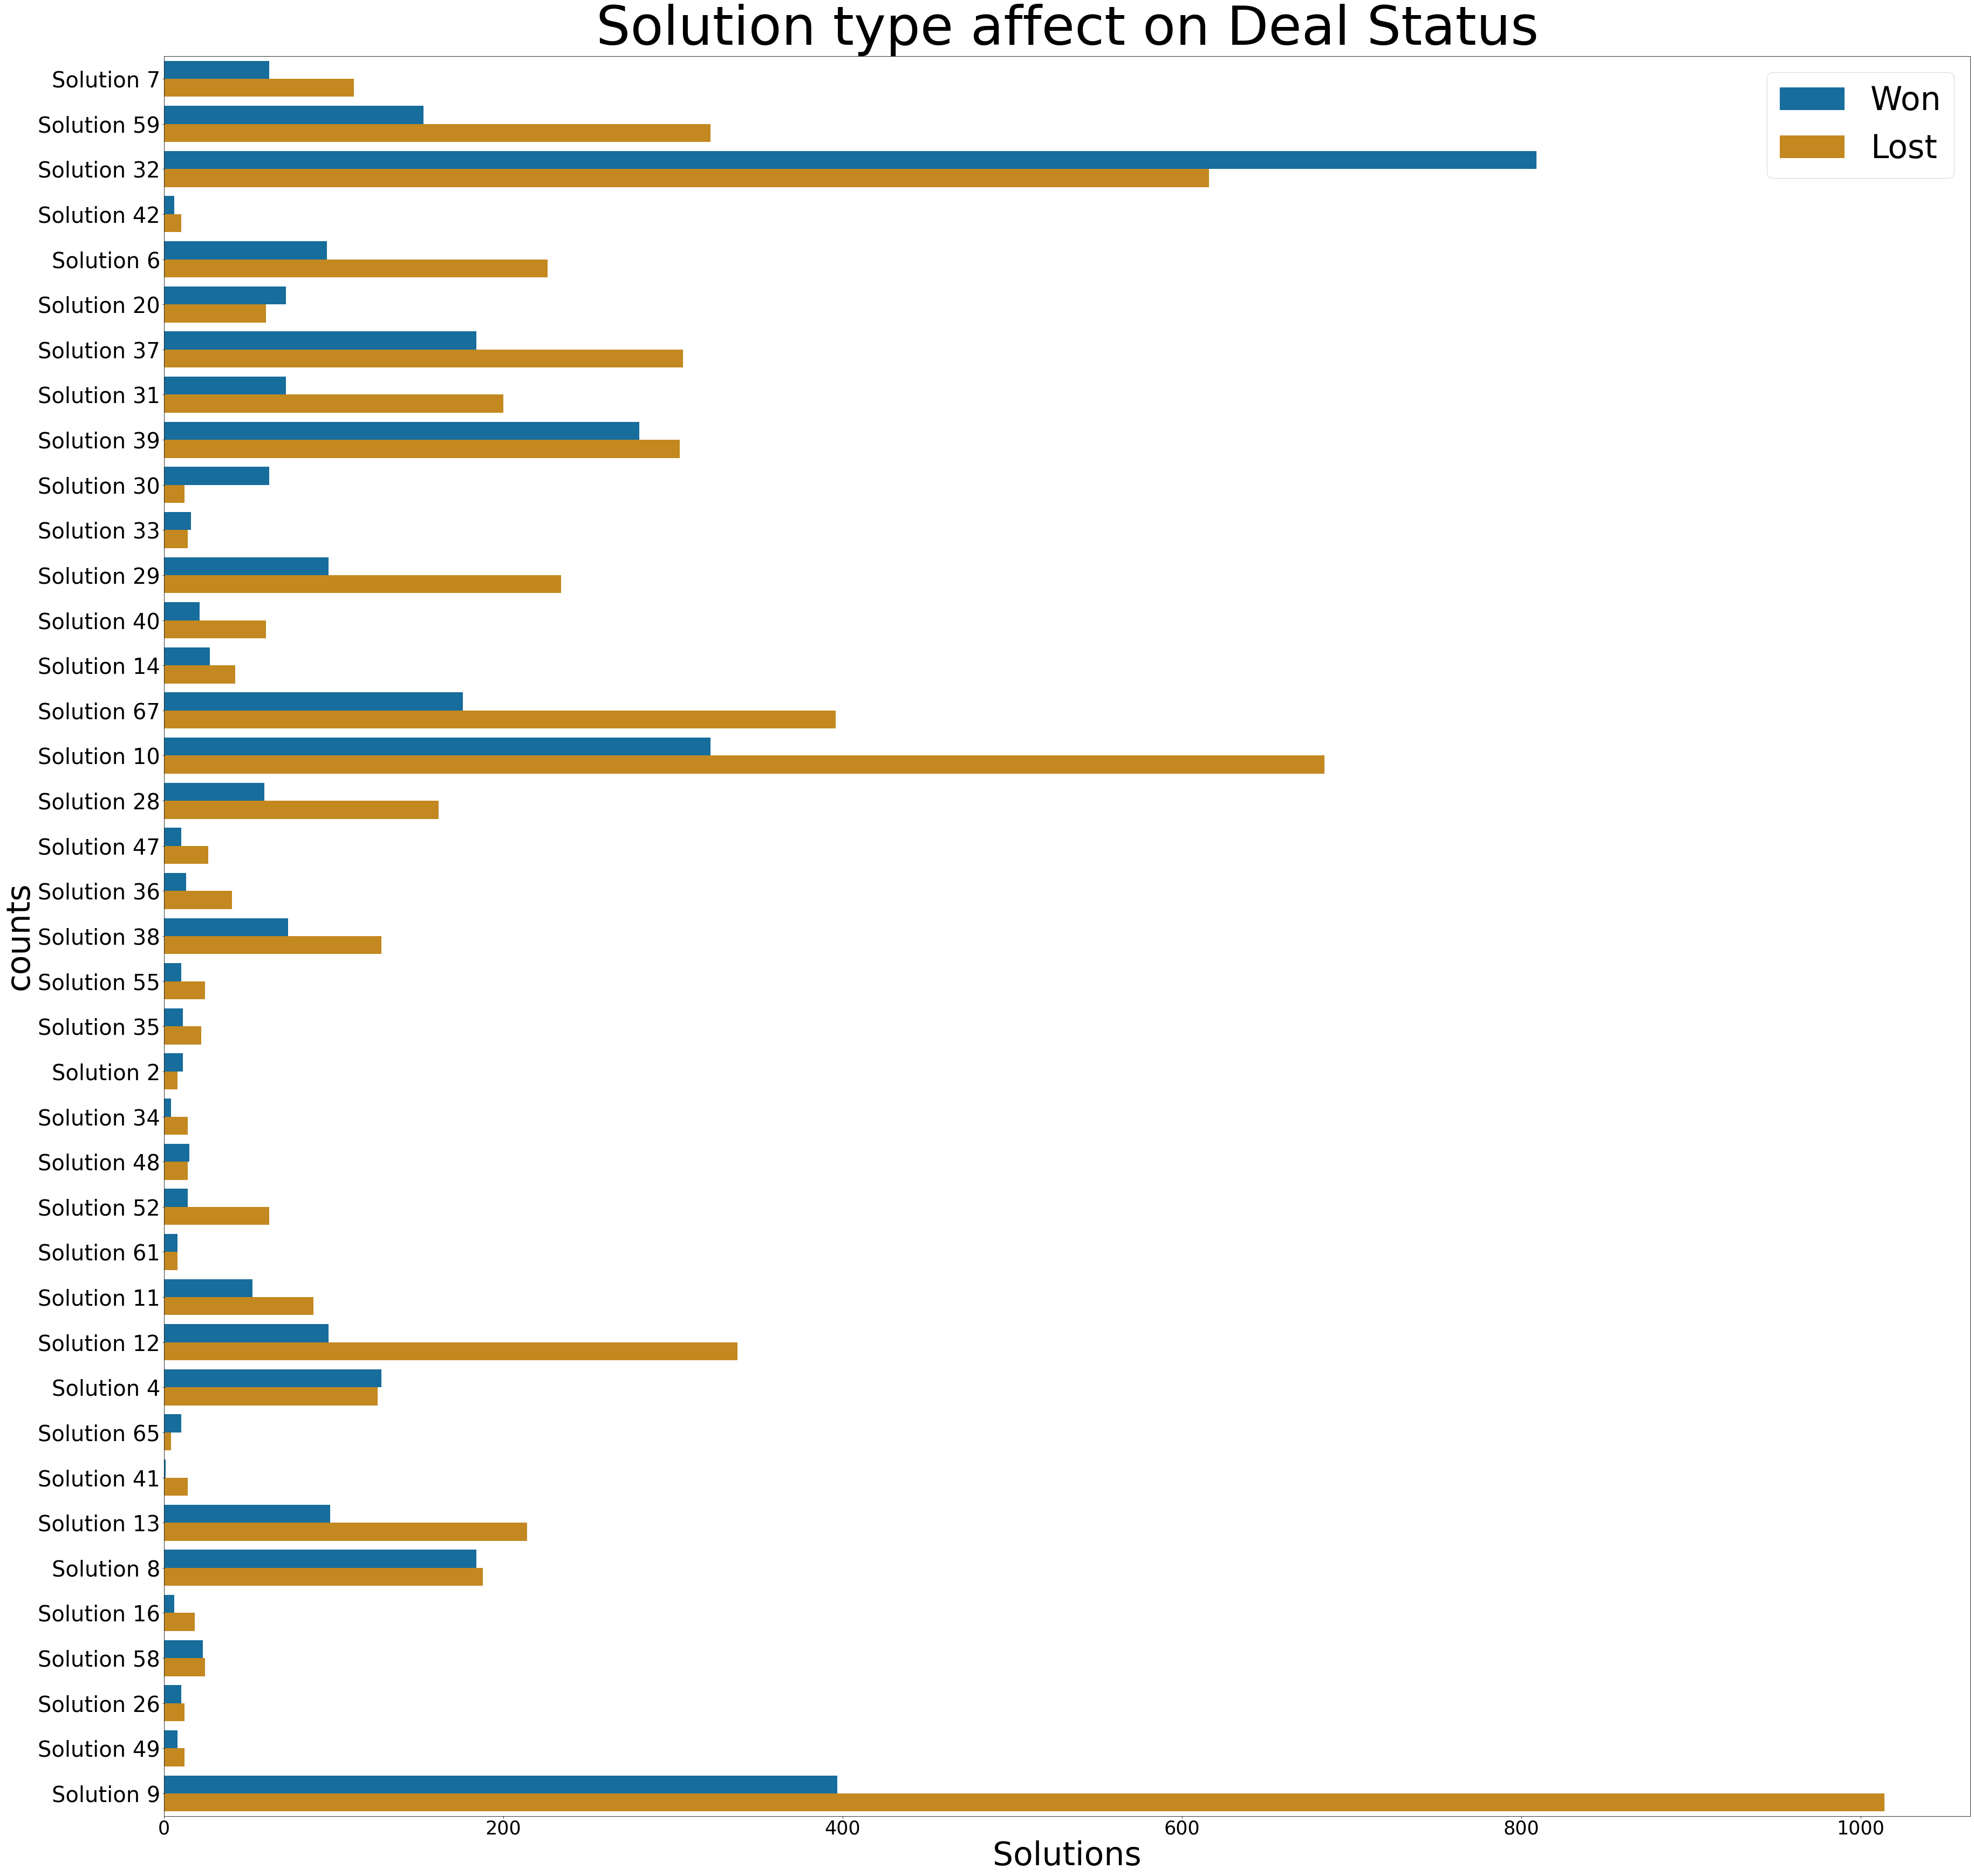

In [24]:
plt.figure(figsize=(60,60))
a =sns.countplot(y="Solution Type",hue = "Deal Status Code",data=df1,palette="colorblind")
a.set_title("Solution type affect on Deal Status",fontsize=100)
plt.xticks(size=35)
plt.yticks(size=40)
a.legend(fontsize=60)
plt.xlabel("Solutions",size=60)
plt.ylabel("counts",size=60)
#for rect in a.patches:
#    a.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 35)

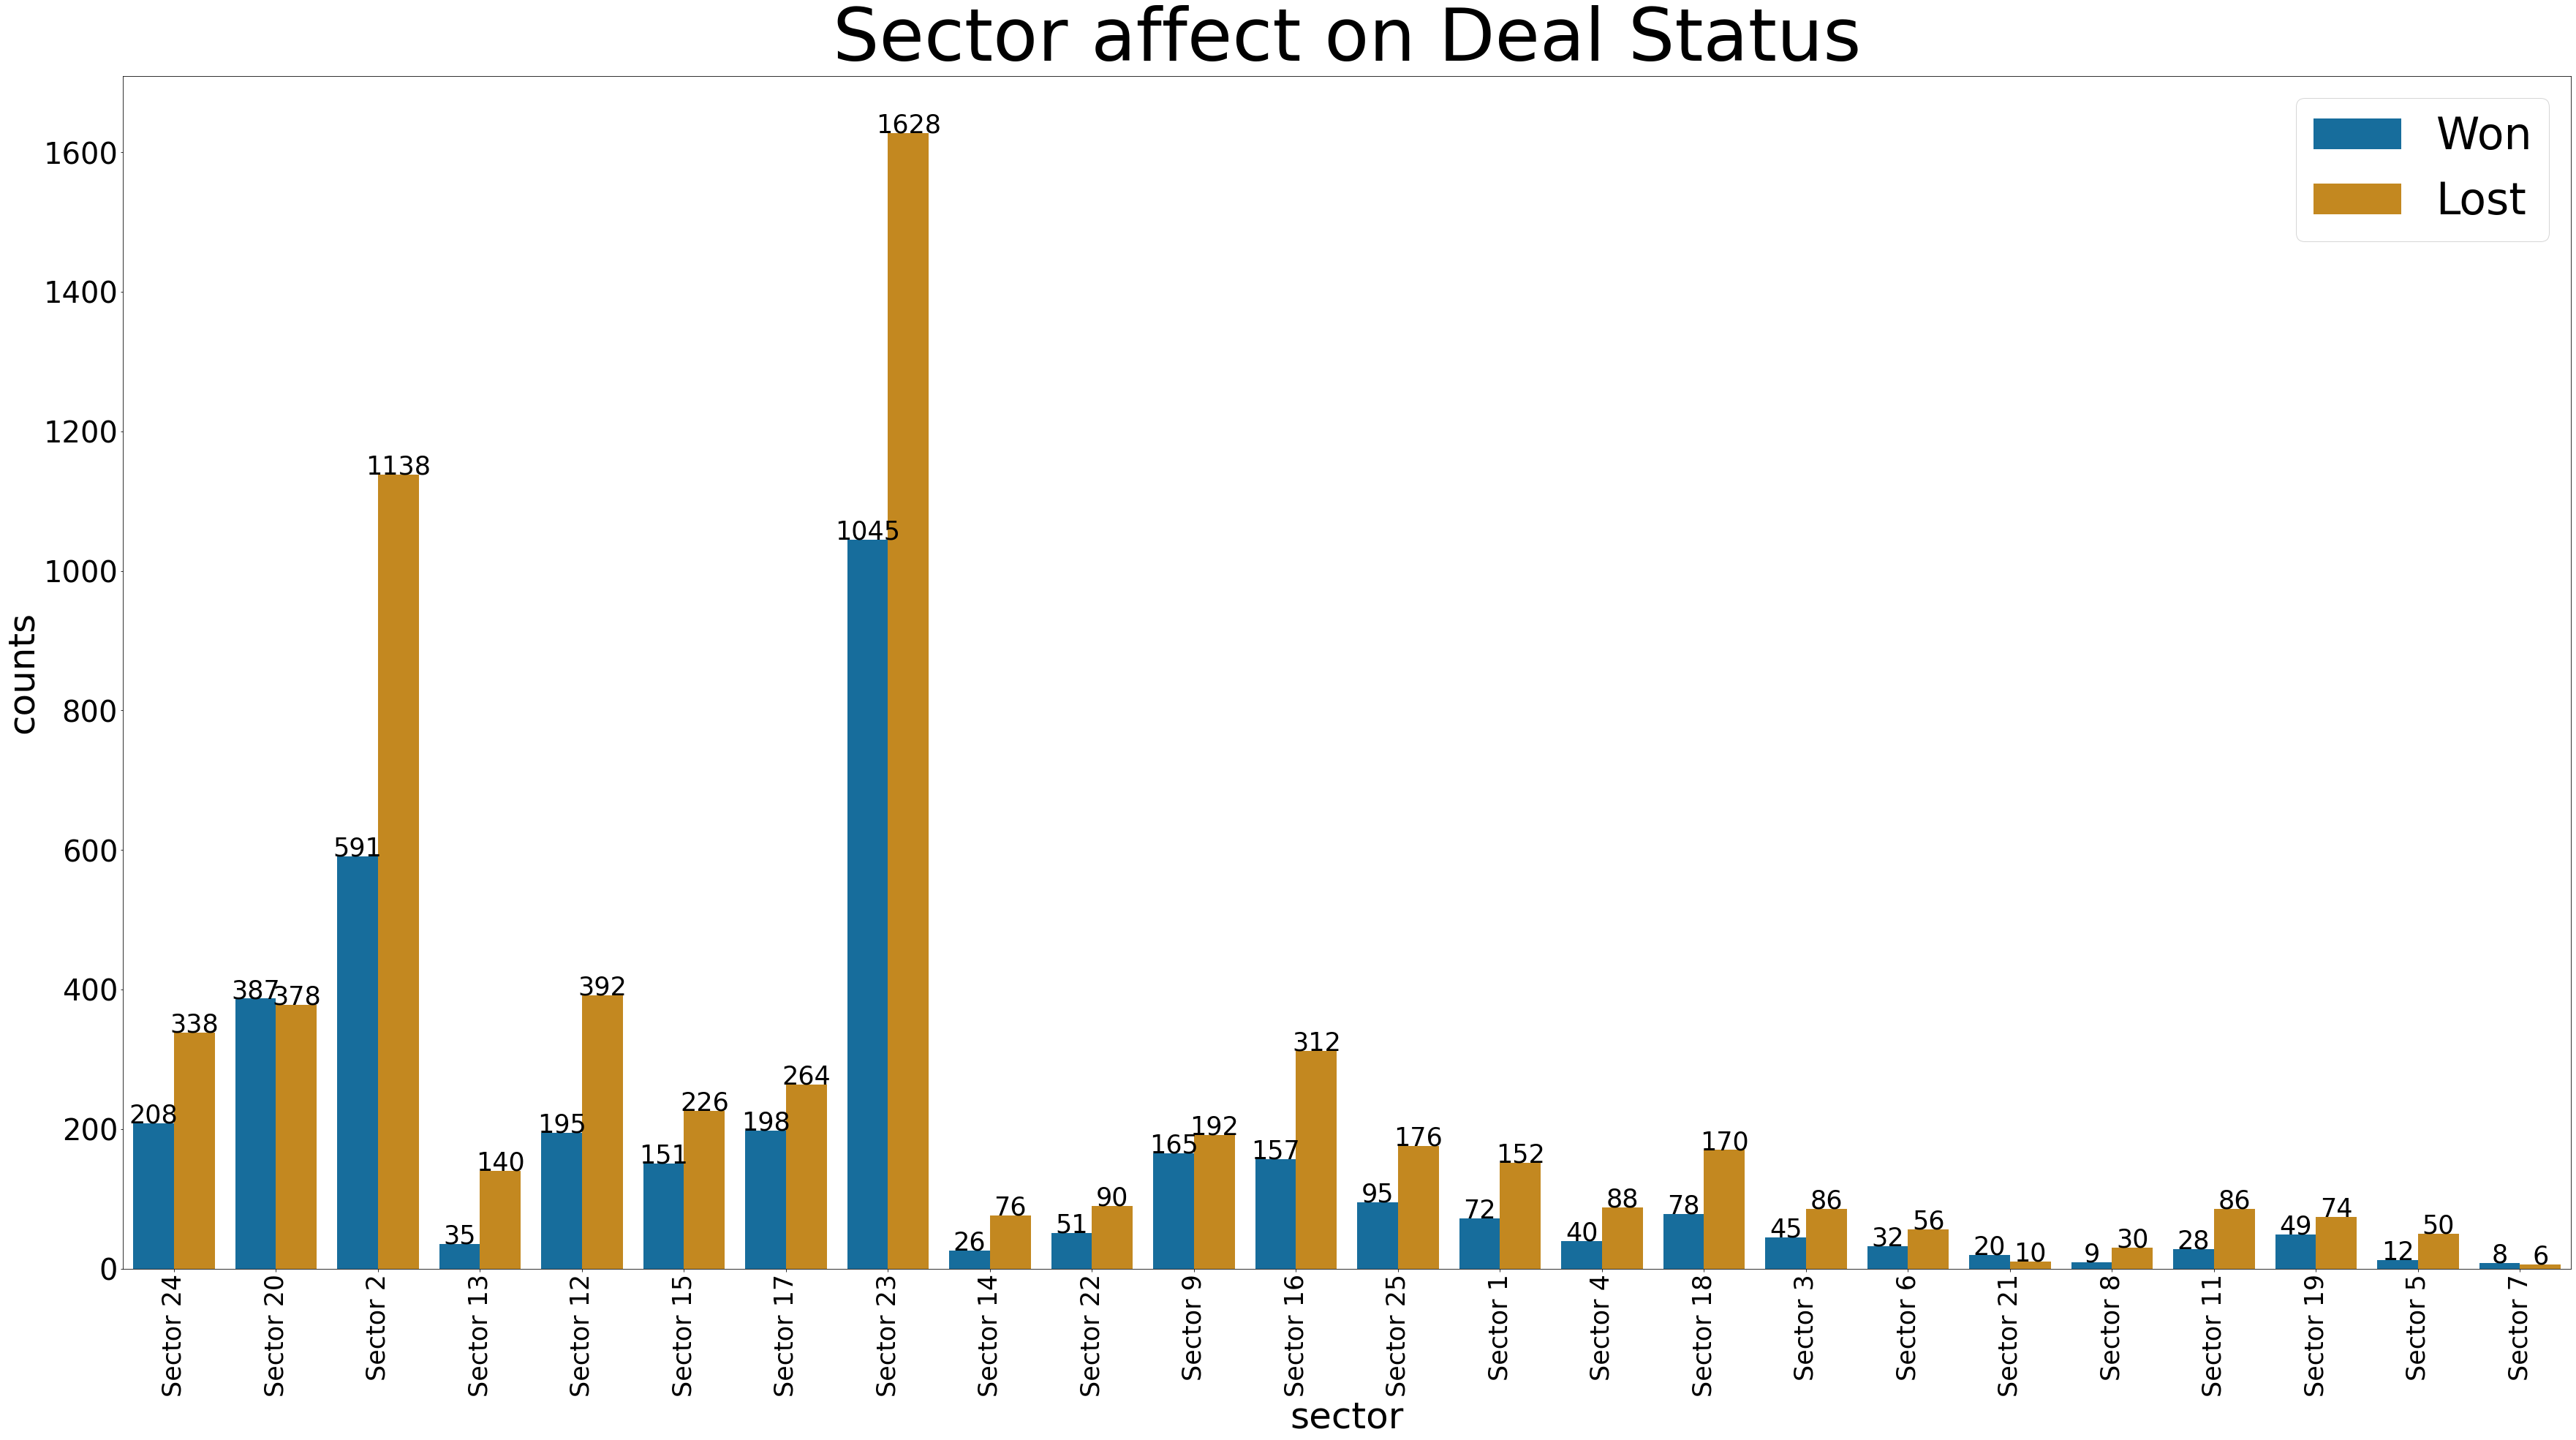

In [25]:
plt.figure(figsize=(60,30))
a =sns.countplot(x="Sector",hue = "Deal Status Code",data=df1,palette="colorblind")
a.set_title("Sector affect on Deal Status",fontsize=100)
plt.xticks(size=35,rotation=90)
plt.yticks(size=40)
a.legend(fontsize=60)
plt.xlabel("sector",size=50)
plt.ylabel("counts",size=50)
for rect in a.patches:
    a.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 35)

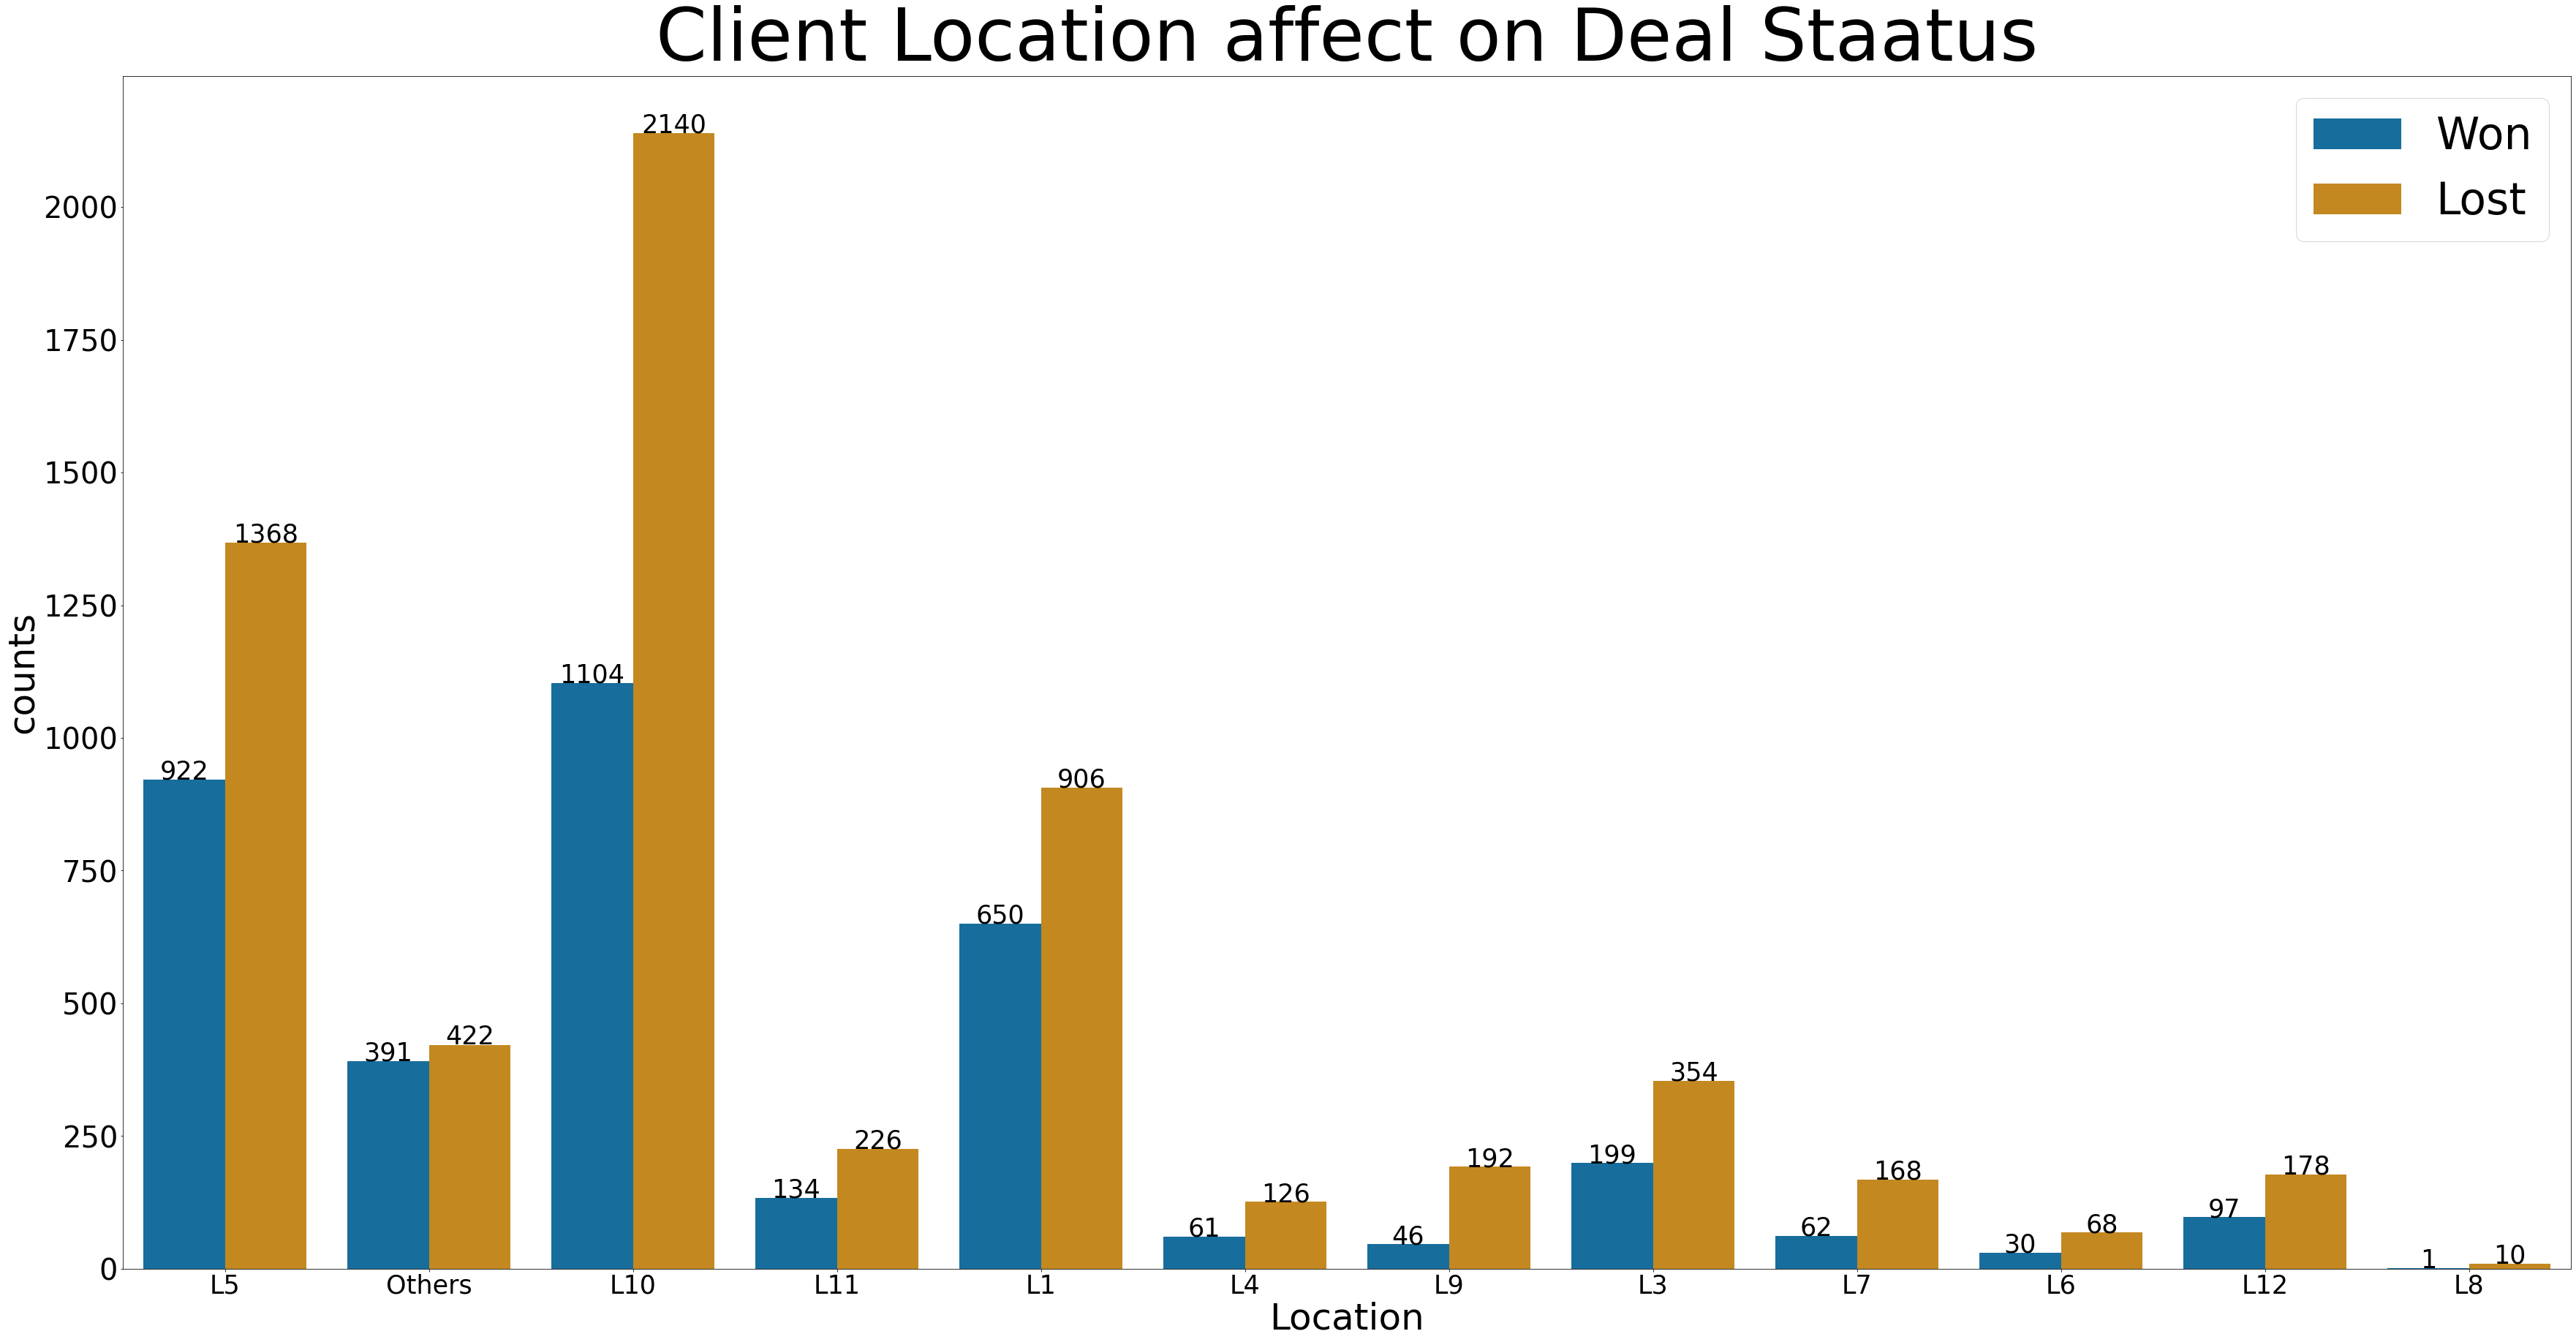

In [26]:
plt.figure(figsize=(60,30))
a =sns.countplot(x="Location",hue = "Deal Status Code",data=df1,palette="colorblind")
a.set_title("Client Location affect on Deal Staatus",fontsize=100)
plt.xticks(size=35)
plt.yticks(size=40)
a.legend(fontsize=60)
plt.xlabel("Location",size=50)
plt.ylabel("counts",size=50)
for rect in a.patches:
    a.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 35)

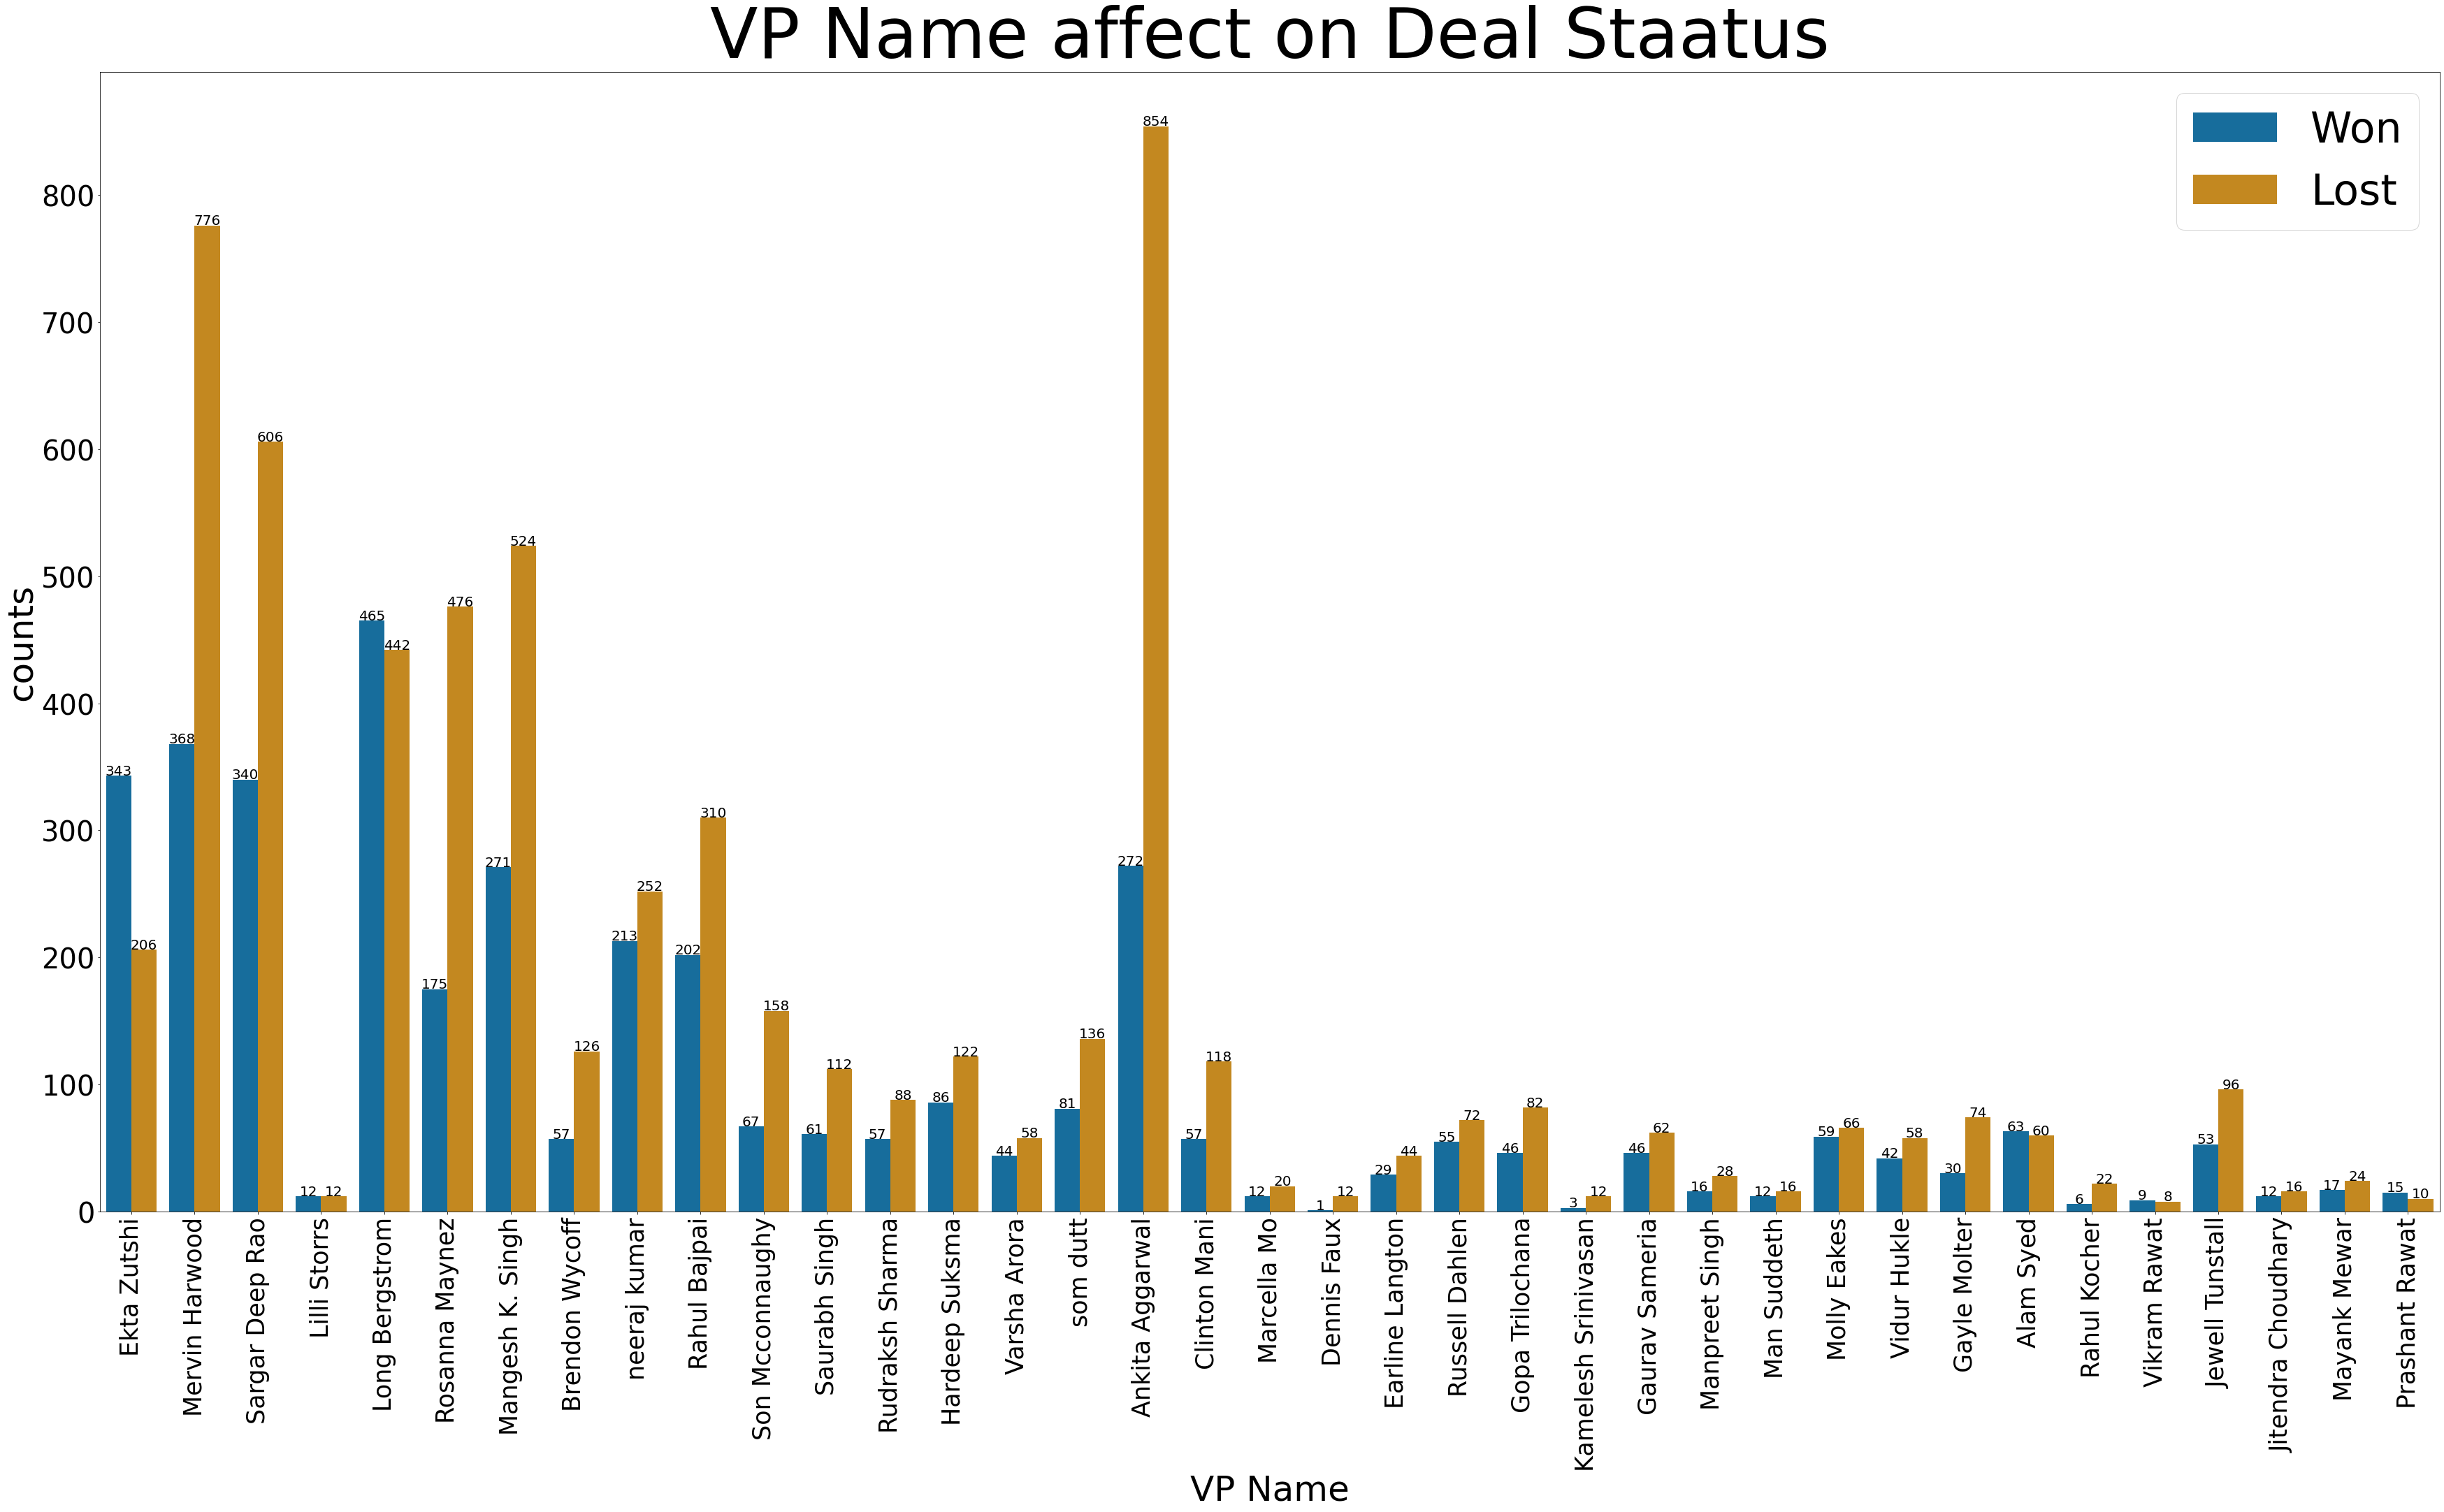

In [27]:
plt.figure(figsize=(60,30))
a =sns.countplot(x="VP Name",hue = "Deal Status Code",data=df1,palette="colorblind")
a.set_title("VP Name affect on Deal Staatus",fontsize=100)
plt.xticks(size=35,rotation=90)
plt.yticks(size=40)
a.legend(fontsize=60)
plt.xlabel("VP Name",size=50)
plt.ylabel("counts",size=50)
for rect in a.patches:
    a.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 20)

### Encoding

In [28]:
df1['Deal Status Code'] = df1["Deal Status Code"].replace({'Won':1,'Lost':0})

### One-Hot Encoding

In [29]:
not_dummy = ['Deal Cost', 'Deal Status Code']
dummy_var = df1.drop(not_dummy,axis=1)
not_dummy = df1.drop(dummy_var,axis=1)
dummy_var = pd.get_dummies(dummy_var,drop_first=True)
df_final = pd.concat([dummy_var,not_dummy],axis=1)

In [30]:
df_final.head()

,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,Client Category_Energy,Client Category_Energy,Client Category_Finance,Client Category_Govt,Client Category_Govt Bank Special,Client Category_Healthcare,Client Category_Holding,Client Category_Hospitality,Client Category_Industries,Client Category_Infrastructure,Client Category_Insurance,Client Category_Internal,Client Category_International Bank,Client Category_International Org,Client Category_Knowledge,Client Category_Logistics,Client Category_Management,Client Category_Manufacturing,Client Category_Media_Journal,Client Category_Others,Client Category_Payment,Client Category_Pharma,Client Category_Power ind,Client Category_Real Estate,Client Category_Research Development,Client Category_Retail_market,Client Category_Services_based,Client Category_Share_market,Client Category_Tech,Client Category_Telecom,Client Category_e-commerce,Solution Type_Solution 11,Solution Type_Solution 12,Solution Type_Solution 13,Solution Type_Solution 14,Solution Type_Solution 16,Solution Type_Solution 2,Solution Type_Solution 20,Solution Type_Solution 26,Solution Type_Solution 28,Solution Type_Solution 29,Solution Type_Solution 30,Solution Type_Solution 31,Solution Type_Solution 32,Solution Type_Solution 33,Solution Type_Solution 34,Solution Type_Solution 35,Solution Type_Solution 36,Solution Type_Solution 37,Solution Type_Solution 38,Solution Type_Solution 39,Solution Type_Solution 4,Solution Type_Solution 40,Solution Type_Solution 41,Solution Type_Solution 42,Solution Type_Solution 47,Solution Type_Solution 48,Solution Type_Solution 49,Solution Type_Solution 52,Solution Type_Solution 55,Solution Type_Solution 58,Solution Type_Solution 59,Solution Type_Solution 6,Solution Type_Solution 61,Solution Type_Solution 65,Solution Type_Solution 67,Solution Type_Solution 7,Solution Type_Solution 8,Solution Type_Solution 9,Sector_Sector 11,Sector_Sector 12,Sector_Sector 13,Sector_Sector 14,Sector_Sector 15,Sector_Sector 16,Sector_Sector 17,Sector_Sector 18,Sector_Sector 19,Sector_Sector 2,Sector_Sector 20,Sector_Sector 21,Sector_Sector 22,Sector_Sector 23,Sector_Sector 24,Sector_Sector 25,Sector_Sector 3,Sector_Sector 4,Sector_Sector 5,Sector_Sector 6,Sector_Sector 7,Sector_Sector 8,Sector_Sector 9,Location_L10,Location_L11,Location_L12,Location_L3,Location_L4,Location_L5,Location_L6,Location_L7,Location_L8,Location_L9,Location_Others,VP Name_Ankita Aggarwal,VP Name_Brendon Wycoff,VP Name_Clinton Mani,VP Name_Dennis Faux,VP Name_Earline Langton,VP Name_Ekta Zutshi,VP Name_Gaurav Sameria,VP Name_Gayle Molter,VP Name_Gopa Trilochana,VP Name_Hardeep Suksma,VP Name_Jewell Tunstall,VP Name_Jitendra Choudhary,VP Name_Kamelesh Srinivasan,VP Name_Lilli Storrs,VP Name_Long Bergstrom,VP Name_Mangesh K. Singh,VP Name_Manpreet Singh,VP Name_Man Suddeth,VP Name_Marcella Mo,VP Name_Mayank Mewar,VP Name_Mervin Harwood,VP Name_Molly Eakes,VP Name_Prashant Rawat,VP Name_Rahul Bajpai,VP Name_Rahul Kocher,VP Name_Rosanna Maynez,VP Name_Rudraksh Sharma,VP Name_Russell Dahlen,VP Name_Sargar Deep Rao,VP Name_Saurabh Singh,VP Name_Son Mcconnaughy,VP Name_Varsha Arora,VP Name_Vidur Hukle,VP Name_Vikram Rawat,VP Name_neeraj kumar,VP Name_som dutt,Deal Cost,Deal Status Code
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150000.00,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,744

## Train - Test Split

In [31]:
X = df_final.drop(columns=['Deal Status Code'])
y = df_final['Deal Status Code']
X.shape , y.shape


((9855, 147), (9855,))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

### scale to all data

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_r = LogisticRegression()
log_r.fit(X_train_sc,y_train)
log_r.score(X_train,y_train) , log_r.score(X_test,y_test)

(0.6236681887366818, 0.6286149162861492)

In [35]:
y_pred_log = log_r.predict(X_test_sc)

In [36]:
confusion_matrix(y_test,y_pred_log)

array([[1064,  175],
       [ 469,  263]])

In [37]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77      1239
           1       0.60      0.36      0.45       732

    accuracy                           0.67      1971
   macro avg       0.65      0.61      0.61      1971
weighted avg       0.66      0.67      0.65      1971



## K-Nearest Neighbors classification

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_train,y_train) , knn.score(X_test,y_test)

(0.7865296803652968, 0.6900050735667174)

In [39]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
confusion_matrix(y_test,y_pred_knn)

array([[1007,  232],
       [ 379,  353]])

In [41]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1239
           1       0.60      0.48      0.54       732

    accuracy                           0.69      1971
   macro avg       0.66      0.65      0.65      1971
weighted avg       0.68      0.69      0.68      1971



## DecisionTree Classification

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [43]:
Dtree = DecisionTreeClassifier(criterion='gini',splitter='random')
Dtree.fit(X_train,y_train)
Dtree.score(X_train,y_train) , Dtree.score(X_test,y_test) 


(0.9942922374429224, 0.8148148148148148)

In [44]:
y_pred_Dtree = Dtree.predict(X_test)
accuracy_score(y_test,y_pred_Dtree)

0.8148148148148148

In [45]:
confusion_matrix(y_test,y_pred_Dtree)

array([[1138,  101],
       [ 264,  468]])

In [46]:
print(classification_report(y_test,y_pred_Dtree))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1239
           1       0.82      0.64      0.72       732

    accuracy                           0.81      1971
   macro avg       0.82      0.78      0.79      1971
weighted avg       0.82      0.81      0.81      1971



##  Random Forest Classification

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_gini = RandomForestClassifier(n_estimators=60, criterion='gini',max_depth=15,min_samples_split=6,max_features=None)
rf_gini.fit(X_train, y_train)
 
rf_gini.score(X_test, y_test)

0.7513952308472857

In [49]:
y_pred_rfgini = rf_gini.predict(X_test)

In [50]:
confusion_matrix(y_test,y_pred_rfgini)

array([[1140,   99],
       [ 391,  341]])

In [51]:
print(classification_report(y_test,y_pred_rfgini))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1239
           1       0.78      0.47      0.58       732

    accuracy                           0.75      1971
   macro avg       0.76      0.69      0.70      1971
weighted avg       0.76      0.75      0.73      1971



In [52]:
rf_entropy = RandomForestClassifier(n_estimators=60, criterion='entropy',max_depth=15,min_samples_split=6,max_features=None)
rf_entropy.fit(X_train, y_train)
 
rf_entropy.score(X_test, y_test)

0.7463216641298833

In [53]:
y_pred_rfentropy = rf_entropy.predict(X_test)

In [54]:
confusion_matrix(y_test,y_pred_rfentropy)

array([[1142,   97],
       [ 403,  329]])

In [55]:
print(classification_report(y_test,y_pred_rfentropy))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1239
           1       0.77      0.45      0.57       732

    accuracy                           0.75      1971
   macro avg       0.76      0.69      0.69      1971
weighted avg       0.75      0.75      0.73      1971



## Gradient Boosting Classification

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
grd = GradientBoostingClassifier(n_estimators=70,max_depth=7,loss='exponential')

In [58]:
grd.fit(X_train,y_train)

GradientBoostingClassifier(loss='exponential', max_depth=7, n_estimators=70)

In [59]:
y_pred_grd = grd.predict(X_test)

In [60]:
confusion_matrix(y_test,y_pred_grd)

array([[1136,  103],
       [ 403,  329]])

In [61]:
print(classification_report(y_test,y_pred_grd))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1239
           1       0.76      0.45      0.57       732

    accuracy                           0.74      1971
   macro avg       0.75      0.68      0.69      1971
weighted avg       0.75      0.74      0.72      1971



## Support Vector Classification

In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.6311516996448503

In [63]:
y_pred_svc = svc.predict(X_test)

In [64]:
confusion_matrix(y_test,y_pred_svc)

array([[1230,    9],
       [ 718,   14]])

In [65]:
print(classification_report(y_test,y_pred_grd))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1239
           1       0.76      0.45      0.57       732

    accuracy                           0.74      1971
   macro avg       0.75      0.68      0.69      1971
weighted avg       0.75      0.74      0.72      1971



## XG boost Classifer

In [67]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xbst = XGBClassifier()
xbst.fit(X_train,y_train)
xbst.score(X_test,y_test)

In [ ]:
y_pred_xbst = xbst.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_xbst)

In [ ]:
print(classification_report(y_test,y_pred_grd))

## now we use oversampling for make accuracy better

In [68]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
sm = SMOTE(random_state = 4) 
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train) 


In [ ]:
y_train_smote.value_counts()

### les't check aftergiving more data and balanced data how model performed 

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_train_smote,y_train_smote)
log_r.score(X_test,y_test)

## K-Nearest Neighbors classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
knn.score(X_test,y_test)

## DecisionTree Classification

In [ ]:
Dtree = DecisionTreeClassifier(criterion='gini')
Dtree.fit(X_train_smote,y_train_smote)
Dtree.score(X_test,y_test)

##  Random Forest Classification

In [ ]:
rf_gini = RandomForestClassifier(n_estimators=60, criterion='gini',max_depth=15,min_samples_split=6,max_features=None)
rf_gini.fit(X_train_smote, y_train_smote)
 
rf_gini.score(X_test, y_test)

In [ ]:
rf_entropy = RandomForestClassifier(n_estimators=60, criterion='entropy',max_depth=15,min_samples_split=6,max_features=None)
rf_entropy.fit(X_train_smote, y_train_smote)
 
rf_entropy.score(X_test, y_test)

## Gradient Boosting Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grd = GradientBoostingClassifier(n_estimators=70,max_depth=7,loss='exponential')
grd.fit(X_train_smote,y_train_smote)
grd.score(X_test,y_test)

## Support Vector Classification

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_smote,y_train_smote)
svc.score(X_test,y_test)

## XG boost Classifer

In [ ]:
xbst = XGBClassifier()
xbst.fit(X_train,y_train)
xbst.score(X_test,y_test)

# now we use k-fold and check the acuracy

In [ ]:
from sklearn.model_selection import cross_val_score


### Logistic regression model performance using cross_val_score

In [ ]:
lin = cross_val_score(log_r, X, y,cv=5)
lin

In [ ]:
np.average(lin)

####  Decision Tree Classification model performance using cross_val_score

In [ ]:
dtree = cross_val_score(Dtree, X, y,cv=5)
np.average(dtree)

####  K-Nearest Neighbors classification model performance using cross_val_score

In [ ]:
Knn = cross_val_score(Dtree, X, y,cv=5)
np.average(Knn)

#### Random Forest Classifier model performance using cross_val_score

In [ ]:
Rf_gini = cross_val_score(rf_gini, X, y,cv=5)
np.average(Rf_gini)

In [ ]:
Rf_entropy = cross_val_score(rf_entropy, X, y,cv=5)
np.average(Rf_entropy)

#### Gradient Boosting Classifier model performance using cross_val_score

In [ ]:
Grd = cross_val_score(grd, X, y,cv=5)
np.average(Grd)

####  Support Vector Classificationmodel performance using cross_val_score

In [ ]:
Svc = cross_val_score(svc, X, y,cv=5)
np.average(Svc)

#### Support Vector Classificationmodel performance using cross_val_score


In [ ]:
Xsbt = cross_val_score(xbst,X,y,cv=5)
np.average(Xsbt)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])] 
            

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

In [ ]:
#Fitting DecisionTreeClassifier Model
classifier = DecisionTreeClassifier(criterion= 'gini')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Loss', 'Won'], xticklabels = ['Predicted loss', 'Predicted Won'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
